# FIT5196  Assessment 2
#### Student Name: YUE GONG
#### Student ID: 28338758

Date: 2/10/2018

Version: 3.0

Environment: Python 3.6.5 and Jupyter notebook

Libraries used:

* pandas(using dataframe, included in Anaconda Python 3.6.5)
* math(for math functions, included in Anaconda Python 3.6.5)
* matplotlib(for visualization, included in Anaconda Python 3.6.5)
* seaborn(for visualization, included in Anaconda Python 3.6.5)
* sklearn(for machine learning, included in Anaconda Python 3.6.5)
* scipy(for math question calculation, included in Anaconda Python 3.6.5)
* datatime(for datatime object, included in Anaconda Python 3.6.5)

## 1. Introduction

The aim of this assessment is to find and fix the anomalies in the dataset with EDA and other data cleaning methods. The dataset is about delivering packages using drones in Victoria, Australia. All the variables are shown below.

* <font color="blue">Id</font>: A **unique** id for the delivery.
* <font color="blue">Drone Type</font>: A categorical attribute for the type of the drone.
* <font color="blue">Post Type</font>: A categorical attribute for the type of delivery (0:normal,1:express).
* <font color="blue">Package Weight</font>: The weight of the package.
* <font color="blue">Origin Region</font>: A categorical attribute representing the region for the origin of the delivery.
* <font color="blue">Origin Latitude</font>: Latitude of the origin
* <font color="blue">Origin Longitude</font>: Longitude of the origin
* <font color="blue">Destination Latitude</font>: Latitude of the destination
* <font color="blue">Destination Longitude</font>: Longitude of the destination
* <font color="blue">Distance</font>: Distance of the journey
* <font color="blue">Departure Date</font>: Date of the departure
* <font color="blue">Departure Time</font>: Time of the departure
* <font color="blue">Travel Time</font>: Travel time (i.e., duration) of the journey 
* <font color="blue">Delivery Time</font>: The time of the delivery

## 2. Import Libraries

In [208]:
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.linalg import solve
from datetime import datetime
from datetime import timedelta

In [209]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("ggplot")

## 3. Inspect the data

### 3.1 Basic information of the data

In [210]:
# Read the file
df = pd.read_csv("28338758.csv")

In [211]:
df.shape

(37435, 16)

In [212]:
df.head()

Id  Drone Type  Post Type  Package Weight  Origin Region  \
0  ID5490722930         1.0        1.0          24.682           41.0   
1  ID1873222318         1.0        0.0          11.162           21.0   
2  ID1853358232         1.0        0.0          42.004           22.0   
3  ID1252187452         2.0        0.0          20.493           25.0   
4  ID1453463903         1.0        0.0          42.588           48.0   

   Destination Region  Origin Latitude  Origin Longitude  \
0                51.0       -37.434971        143.086046   
1                21.0       -37.631498        147.293582   
2                 3.0       -38.957931        147.248241   
3                40.0       -38.169531        144.936011   
4                21.0       -36.615010        145.013192   

   Destination Latitude  Destination Longitude  Journey Distance  \
0            -37.626014             148.343174           464.513   
1            -37.591253             147.199682             9.415   
2            -37.207146             143.809040           358.832   
3            -38.081027             148.320117           296.490   
4            -37.685512             147.077540           218.505   

  Departure Date Departure Time  Travel Time Delivery Time  Delivery Fare  
0     2018-03-21       10:59:21       442.67      18:22:01         144.94  
1     2018-04-14       13:56:41        16.01      14:12:41          95.07  
2     2018-06-17       19:22:03       343.59       1:05:38         119.89  
3     2018-04-16       04:39:04       280.53       9:19:35         170.89  
4     2018-02-16       12:47:54       212.04      16:19:56         113.54

In [213]:
# Check the column names
df.columns

Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Delivery Fare'],
      dtype='object')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37435 entries, 0 to 37434
Data columns (total 16 columns):
Id                       37416 non-null object
Drone Type               37425 non-null float64
Post Type                37415 non-null float64
Package Weight           37435 non-null float64
Origin Region            37425 non-null float64
Destination Region       37425 non-null float64
Origin Latitude          37435 non-null float64
Origin Longitude         37435 non-null float64
Destination Latitude     37435 non-null float64
Destination Longitude    37435 non-null float64
Journey Distance         37435 non-null float64
Departure Date           37435 non-null object
Departure Time           37435 non-null object
Travel Time              37395 non-null float64
Delivery Time            37435 non-null object
Delivery Fare            37405 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.6+ MB


The dataset dealing with consists of 37435 observations of 16 variables. 

Categorical variables: 

    Drone Type, Post Type, Origin Region, Destination Region

Numerical variables:
* Continuous: Package Weight
* Discrete: Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance, Travel Time and Delivery Fare
* Time-based: Departure Date, Departure Time and Delivery Time

### 3.2 The distribution and possible outliers

First we covert the category data into category type.

In [215]:
df[["Drone Type", "Post Type", "Origin Region", "Destination Region"]] = df[[
    "Drone Type", "Post Type", "Origin Region", "Destination Region"
]].astype("category")

Then using `describe` function and `boxplot`, we can get deeper insight from the data.

In [216]:
df.describe()

Package Weight  Origin Latitude  Origin Longitude  \
count    37435.000000     37435.000000      37435.000000   
mean        28.297623       -37.731120        145.333698   
std         13.545301         1.916158          6.943332   
min          5.000000       -39.006897       -148.387396   
25%         16.588000       -38.417122        144.006656   
50%         28.337000       -37.809018        145.421698   
75%         39.826500       -37.084536        146.983865   
max         60.960000        38.809263        148.450979   

       Destination Latitude  Destination Longitude  Journey Distance  \
count          37435.000000           37435.000000      37435.000000   
mean             -37.723159             145.337061        218.333504   
std                1.912133               6.948116        112.039253   
min              -39.006897            -148.143050          0.770000   
25%              -38.421844             144.028548        132.613000   
50%              -37.796000             145.442046        206.806000   
75%              -37.050179             146.958264        292.467000   
max               38.970471             148.450979        559.843000   

        Travel Time  Delivery Fare  
count  37395.000000   37405.000000  
mean     207.752459     154.138016  
std      103.298225      68.286459  
min        7.560000      69.860000  
25%      128.530000     121.780000  
50%      197.100000     146.790000  
75%      276.595000     175.040000  
max      520.620000    1355.270000

In [217]:
df.describe(include=["O", "category"])

Id  Drone Type  Post Type  Origin Region  \
count          37416     37425.0    37415.0        37425.0   
unique         37375         3.0        2.0           57.0   
top     ID1232201700         1.0        0.0           34.0   
freq               2     18639.0    26217.0          730.0   

        Destination Region Departure Date Departure Time Delivery Time  
count              37425.0          37435          37435         37435  
unique                57.0            274          30445         30382  
top                   23.0     2018-04-16       17:03:34      12:00:56  
freq                 721.0            214              5             5

In [218]:
df.isnull().sum()

Id                       19
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

In [219]:
df.duplicated().sum()

40

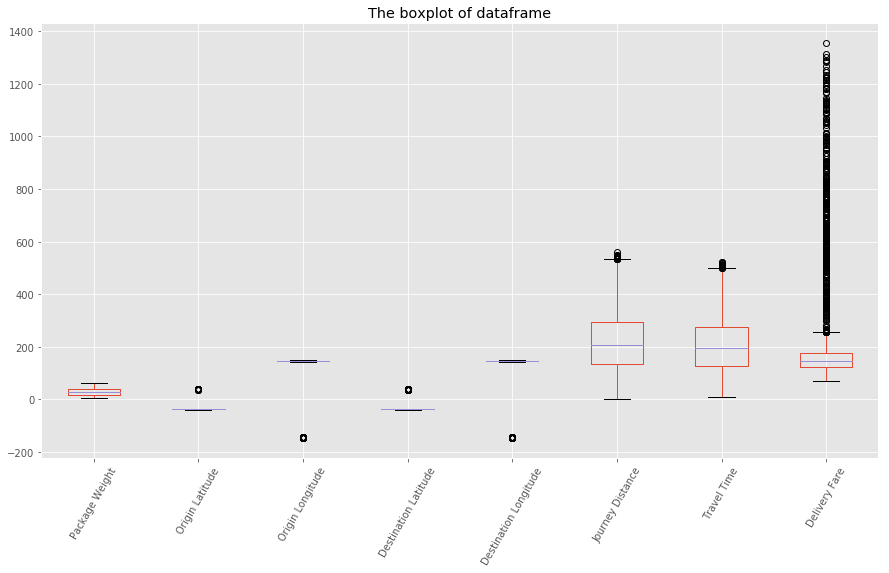

In [220]:
plt.figure()
df.boxplot(rot=60)
plt.title("The boxplot of dataframe")
plt.show()

* Missing values in `Travel Time` (40), `Delivery Fare` (30) `Id` (19), `Drone Type` (10), `Post Type` (20), `Origin Region` (20), `Destination Region` (20)
* Outliers: must in `Delivery Fare`, may in `Journey Distance` and `Travel Time`.
* The max and min of Journey Distance and Travel Time seems to be strange.
* As Victoria is in the South East of earth. Thus the positive latitude and negative longitude must be wrong.
* There are some duplicated ID in column Id and the frequency is 2.
* Drone Type contains three types: 1, 2 and 3
* Two different Post Type: 0 and 1
* The total category of regions is 57
* There are 40 duplicated rows in the dataset.

For the purpose of analysis, use numerical symbols represent the category data.

In [221]:
df[["Drone Type", "Post Type", "Origin Region", "Destination Region"]] = df[[
    "Drone Type", "Post Type", "Origin Region", "Destination Region"
]].astype("float")

## 4 Identify and fix anomalies

### 4.1 Remove duplicates

We already know that there are duplicated rows in this dataset, delete it first. After fixing the data, test the data again and delete the remain duplicates. 

In [222]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [223]:
df.describe(include="all")

Id    Drone Type     Post Type  Package Weight  \
count          37376  37385.000000  37375.000000    37395.000000   
unique         37375           NaN           NaN             NaN   
top     ID5355736242           NaN           NaN             NaN   
freq               2           NaN           NaN             NaN   
mean             NaN      1.702688      0.299371       28.296797   
std              NaN      0.781267      0.457989       13.545500   
min              NaN      1.000000      0.000000        5.000000   
25%              NaN      1.000000      0.000000       16.589500   
50%              NaN      2.000000      0.000000       28.337000   
75%              NaN      2.000000      1.000000       39.824000   
max              NaN      3.000000      1.000000       60.960000   

        Origin Region  Destination Region  Origin Latitude  Origin Longitude  \
count    37385.000000        37385.000000     37395.000000      37395.000000   
unique            NaN                 NaN              NaN               NaN   
top               NaN                 NaN              NaN               NaN   
freq              NaN                 NaN              NaN               NaN   
mean        28.835014           28.942624       -37.730816        145.332976   
std         16.425242           16.455845         1.917031          6.946806   
min          1.000000            1.000000       -39.006897       -148.387396   
25%         15.000000           15.000000       -38.417088        144.006528   
50%         29.000000           29.000000       -37.808622        145.421598   
75%         43.000000           43.000000       -37.082669        146.983280   
max         57.000000           57.000000        38.809263        148.450979   

        Destination Latitude  Destination Longitude  Journey Distance  \
count           37395.000000           37395.000000      37395.000000   
unique                   NaN                    NaN               NaN   
top                      NaN                    NaN               NaN   
freq                     NaN                    NaN               NaN   
mean              -37.723173             145.337220        218.315181   
std                 1.912963               6.951641        112.020458   
min               -39.006897            -148.143050          0.770000   
25%               -38.421881             144.028732        132.603000   
50%               -37.795968             145.442046        206.802000   
75%               -37.050402             146.959333        292.440500   
max                38.970471             148.450979        559.843000   

       Departure Date Departure Time   Travel Time Delivery Time  \
count           37395          37395  37355.000000         37395   
unique            274          30445           NaN         30382   
top        2018-04-16       11:03:15           NaN      10:02:10   
freq              214              5           NaN             5   
mean              NaN            NaN    207.736108           NaN   
std               NaN            NaN    103.281380           NaN   
min               NaN            NaN      7.560000           NaN   
25%               NaN            NaN    128.495000           NaN   
50%               NaN            NaN    197.080000           NaN   
75%               NaN            NaN    276.580000           NaN   
max               NaN            NaN    520.620000           NaN   

        Delivery Fare  
count    37365.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       154.129883  
std         68.237032  
min         69.860000  
25%        121.790000  
50%        146.790000  
75%        175.040000  
max       1355.270000

### 4.2 Fix latitude and longitude

We have already known that the **positive latitudes** and **negative longitudes** are incorrect as the location of Victoria is in South East of earth.

In [224]:
df[["Origin Latitude", "Destination Latitude"]] = df[[
    "Origin Latitude", "Destination Latitude"
]].applymap(lambda x: x if x < 0 else -x)

In [225]:
df[["Origin Longitude", "Destination Longitude"]] = df[[
    "Origin Longitude", "Destination Longitude"
]].applymap(lambda x: x if x > 0 else -x)

### 4.3 Departure Date

The values of `Departure Date` must be in the same format with right values that it can be meaningful. First, assume there are wrong values in this column, find them by following methods.

In [226]:
pd.to_datetime(
    df["Departure Date"], infer_datetime_format=True,
    errors="coerce").isnull().sum()

217

In [227]:
df.loc[pd.to_datetime(
    df["Departure Date"], infer_datetime_format=True, errors="coerce")
       .isnull(), "Departure Date"].unique()

array(['2018-22-07', '2018-06-31', '2018-28-06', '2018-21-04',
       '2018-27-07', '2018-28-03', '2018-15-05', '2018-18-02',
       '2018-17-07', '2018-24-01', '2018-19-02', '2018-25-02',
       '2018-02-30', '2018-26-07', '2018-18-04', '2018-24-05',
       '2018-04-31', '2018-13-02', '2018-27-02', '2018-23-03',
       '2018-14-03', '2018-25-05', '2018-27-04', '2018-26-02',
       '2018-17-04', '2018-28-04', '2018-16-07', '2018-21-06',
       '2018-26-05', '2018-15-04', '2018-25-07', '2018-16-03',
       '2018-13-05', '2018-20-04', '2018-17-03', '2018-18-05',
       '2018-25-01', '2018-26-04', '2018-24-03', '2018-28-02',
       '2018-25-04', '2018-18-01', '2018-14-07', '2018-26-06',
       '2018-21-02', '2018-13-07', '2018-14-02', '2018-13-01',
       '2018-28-05', '2018-23-07', '2018-23-04', '2018-17-05',
       '2018-24-04', '2018-16-04', '2018-18-07', '2018-20-03',
       '2018-22-01', '2018-20-07', '2018-23-02', '2018-24-06',
       '2018-24-02', '2018-28-07', '2018-15-01', '2018-

It shows that 217 dates are in the wrong format. The correct data is in the format of year-month-day, and error ones are most in the format of year-day-month, like `2018-21-04`, fix it.

Split the date into year, month and day to check.

In [228]:
temp_date = df["Departure Date"].apply(lambda s: pd.Series({'Year': s.split("-")[0].strip(),
                            'Month':s.split("-")[1].strip(), 'Day':s.split("-")[2].strip()}))

In [229]:
temp_date.Year.unique()

array(['2018'], dtype=object)

In [230]:
temp_date.Month.unique()

array(['03', '04', '06', '02', '05', '07', '01', '22', '28', '21', '27',
       '15', '18', '17', '24', '19', '25', '26', '13', '23', '14', '16',
       '20', '30'], dtype=object)

In [231]:
temp_date.Day.unique()

array(['21', '14', '17', '16', '09', '24', '25', '28', '19', '20', '23',
       '04', '05', '27', '06', '03', '13', '15', '12', '10', '22', '26',
       '08', '07', '02', '11', '18', '31', '01', '30'], dtype=object)

We can see invalid moth like 28, 27 in the split `Month` column. 

In [232]:
invalid_month = [i for i in temp_date.Month.unique() if int(i) > 12]
invalid_month

['22',
 '28',
 '21',
 '27',
 '15',
 '18',
 '17',
 '24',
 '19',
 '25',
 '26',
 '13',
 '23',
 '14',
 '16',
 '20',
 '30']

In [233]:
temp_date.loc[temp_date.Month.isin(invalid_month), ["Month", "Day"]]

Month Day
53       22  07
518      28  06
854      21  04
920      27  07
956      28  03
964      15  05
981      18  02
993      17  07
1007     24  01
1105     19  02
1185     25  02
1197     15  05
2919     26  07
3115     18  04
3235     18  02
3317     24  05
5028     13  02
5102     27  02
5118     23  03
6643     14  03
7031     19  02
7106     25  05
7124     27  04
7144     26  02
7170     17  04
7222     24  01
7244     28  04
7404     16  07
7408     18  04
8336     21  06
...     ...  ..
29645    17  05
29703    23  07
29782    14  06
29829    19  04
29883    15  02
30240    26  02
31213    17  05
31692    20  03
31786    27  04
31852    23  05
31909    13  05
31914    25  02
31944    16  04
32012    30  04
33311    14  04
33625    13  04
33665    14  06
33889    16  06
34004    23  02
34008    26  06
34972    20  05
35361    25  01
35698    15  04
35727    15  02
35815    21  03
35863    25  05
35878    25  02
35965    15  05
36331    23  02
37208    28  01

[117 rows x 2 columns]

All these in the wrong position, chang the `Month` and `Day`.

In [234]:
temp_date.loc[temp_date.Month.isin(invalid_month),
              ["Month", "Day"]] = temp_date.loc[temp_date.Month.isin(
                  invalid_month), ["Day", "Month"]].values

In [235]:
temp_date["Date"] = temp_date["Year"] + temp_date["Month"] + temp_date["Day"]

After this step, there are still 217-117=100 rows contain wrong date, checking these rows.

In [236]:
temp_date.loc[pd.to_datetime(
    temp_date["Date"], infer_datetime_format=True, errors="coerce").isnull(),
              "Date"].value_counts()

20180230    39
20180631    32
20180431    29
Name: Date, dtype: int64

In this analysis, assume that these are typos. We change the day 30 to 28, 31 to 30.

In [237]:
temp_date.loc[pd.to_datetime(temp_date["Date"],infer_datetime_format=True, errors="coerce").isnull(), "Date"] = temp_date.loc[
    pd.to_datetime(temp_date["Date"],infer_datetime_format=True, errors="coerce").isnull(), "Date"].apply(lambda x: x.replace("30","28") if x=="20180230" else x.replace("31","30"))

Change the original data. As default `datetime` object in python is in the format of year-month-day-hour-minutes-seconds, we only keep the date part using `dt.date`.

In [238]:
df["Departure Date"] = pd.to_datetime(
    temp_date.Date, infer_datetime_format=True).dt.date

In [239]:
df["Departure Date"]

0        2018-03-21
1        2018-04-14
2        2018-06-17
3        2018-04-16
4        2018-02-16
5        2018-05-09
6        2018-05-24
7        2018-06-25
8        2018-04-28
9        2018-02-19
10       2018-02-20
11       2018-02-23
12       2018-06-04
13       2018-06-16
14       2018-02-16
15       2018-04-21
16       2018-03-05
17       2018-02-17
18       2018-04-27
19       2018-07-20
20       2018-07-06
21       2018-07-05
22       2018-06-19
23       2018-02-16
24       2018-03-03
25       2018-05-06
26       2018-05-19
27       2018-04-06
28       2018-04-27
29       2018-02-13
            ...    
37365    2018-04-26
37366    2018-05-20
37367    2018-04-11
37368    2018-01-25
37369    2018-02-05
37370    2018-07-01
37371    2018-04-21
37372    2018-07-25
37373    2018-02-25
37374    2018-06-15
37375    2018-03-28
37376    2018-02-04
37377    2018-03-02
37378    2018-05-03
37379    2018-03-01
37380    2018-07-28
37381    2018-02-24
37382    2018-07-22
37383    2018-02-12


For the `Departure time` and `Delivery Time`, temporarily keep the default date, because it is easily to use the `datetime` object to calculate the `timedelta`.

In [240]:
df["Departure Time"] = pd.to_datetime(df["Departure Time"], format="%H:%M:%S")

In [241]:
df["Delivery Time"] = pd.to_datetime(df["Delivery Time"], format="%H:%M:%S")

### 4.4 Id

There are 19 missing values in `Id` as we already known.

In [242]:
df["Id"].isnull().sum()

19

In [243]:
df[df["Id"].duplicated()]

Id  Drone Type  Post Type  Package Weight  Origin Region  \
37376           NaN         3.0        0.0          14.111           12.0   
37377           NaN         3.0        0.0          35.695            7.0   
37378           NaN         1.0        1.0           6.591           37.0   
37379           NaN         1.0        1.0          24.020           26.0   
37380           NaN         1.0        0.0          41.063            5.0   
37381           NaN         1.0        0.0          30.280           15.0   
37382           NaN         1.0        0.0          15.255           11.0   
37383           NaN         2.0        0.0          41.643           27.0   
37384           NaN         3.0        1.0          46.269           57.0   
37385           NaN         1.0        0.0           6.091            6.0   
37386           NaN         2.0        1.0          37.130           32.0   
37387           NaN         2.0        0.0          12.271           33.0   
37388           NaN         1.0        0.0          50.084           51.0   
37389           NaN         1.0        0.0          42.808           37.0   
37390           NaN         2.0        0.0          43.121           20.0   
37391           NaN         1.0        0.0          33.214           22.0   
37392           NaN         1.0        0.0          39.245           53.0   
37393  ID5355736242         1.0        1.0          20.762           20.0   
37394           NaN         3.0        0.0          10.389            4.0   

       Destination Region  Origin Latitude  Origin Longitude  \
37376                24.0       -36.829836        143.147187   
37377                13.0       -36.610594        143.967377   
37378                27.0       -38.419152        144.102827   
37379                12.0       -38.665007        142.879721   
37380                42.0       -38.573866        143.246262   
37381                 9.0       -38.828406        146.182387   
37382                31.0       -36.958028        148.404871   
37383                32.0       -36.847150        146.803365   
37384                 2.0       -36.800325        146.255385   
37385                29.0       -37.267417        147.342325   
37386                44.0       -38.203149        147.399965   
37387                46.0       -37.807613        145.855579   
37388                44.0       -37.443312        148.431690   
37389                18.0       -38.462231        144.066434   
37390                13.0       -38.276011        143.739211   
37391                18.0       -38.818542        147.042501   
37392                33.0       -38.383251        147.898265   
37393                 8.0       -38.427387        143.696334   
37394                10.0       -37.624975        144.501079   

       Destination Latitude  Destination Longitude  Journey Distance  \
37376            -38.036512             142.795553           137.873   
37377            -38.142446             145.896068           241.205   
37378            -36.811500             147.047226           315.303   
37379            -37.067713             142.953474           177.924   
37380            -37.768091             146.380687           288.581   
37381            -37.814939             143.234709           281.046   
37382            -38.822954             144.087223           432.328   
37383            -38.124598             147.232621           147.169   
37384            -37.346036             145.175243           113.548   
37385            -37.020902             145.044654           205.712   
37386            -38.010201             146.862970            51.708   
37387            -38.874694             146.617183           136.128   
37388            -37.942599             146.877297           147.767   
37389            -38.631251             145.042602            87.044   
37390            -38.241258             145.947731           193.078   
37391            -38.625053             145

In [244]:
df["Id"].duplicated().sum()

19

After delete duplicated rows, the number of duplicated ID is 19, which are all the `NaN` values except 1. Try test the duplicated values except column `Id`.

In [245]:
df[df.loc[:, "Drone Type":"Delivery Fare"].duplicated()]

Id  Drone Type  Post Type  Package Weight  Origin Region  \
37375  NaN         1.0        0.0          33.148           28.0   
37376  NaN         3.0        0.0          14.111           12.0   
37377  NaN         3.0        0.0          35.695            7.0   
37378  NaN         1.0        1.0           6.591           37.0   
37379  NaN         1.0        1.0          24.020           26.0   
37380  NaN         1.0        0.0          41.063            5.0   
37381  NaN         1.0        0.0          30.280           15.0   
37382  NaN         1.0        0.0          15.255           11.0   
37383  NaN         2.0        0.0          41.643           27.0   
37384  NaN         3.0        1.0          46.269           57.0   
37385  NaN         1.0        0.0           6.091            6.0   
37386  NaN         2.0        1.0          37.130           32.0   
37387  NaN         2.0        0.0          12.271           33.0   
37388  NaN         1.0        0.0          50.084           51.0   
37389  NaN         1.0        0.0          42.808           37.0   
37390  NaN         2.0        0.0          43.121           20.0   
37391  NaN         1.0        0.0          33.214           22.0   
37392  NaN         1.0        0.0          39.245           53.0   
37394  NaN         3.0        0.0          10.389            4.0   

       Destination Region  Origin Latitude  Origin Longitude  \
37375                41.0       -38.931426        143.489414   
37376                24.0       -36.829836        143.147187   
37377                13.0       -36.610594        143.967377   
37378                27.0       -38.419152        144.102827   
37379                12.0       -38.665007        142.879721   
37380                42.0       -38.573866        143.246262   
37381                 9.0       -38.828406        146.182387   
37382                31.0       -36.958028        148.404871   
37383                32.0       -36.847150        146.803365   
37384                 2.0       -36.800325        146.255385   
37385                29.0       -37.267417        147.342325   
37386                44.0       -38.203149        147.399965   
37387                46.0       -37.807613        145.855579   
37388                44.0       -37.443312        148.431690   
37389                18.0       -38.462231        144.066434   
37390                13.0       -38.276011        143.739211   
37391                18.0       -38.818542        147.042501   
37392                33.0       -38.383251        147.898265   
37394                10.0       -37.624975        144.501079   

       Destination Latitude  Destination Longitude  Journey Distance  \
37375            -37.446395             142.966131           171.531   
37376            -38.036512             142.795553           137.873   
37377            -38.142446             145.896068           241.205   
37378            -36.811500             147.047226           315.303   
37379            -37.067713             142.953474           177.924   
37380            -37.768091             146.380687           288.581   
37381            -37.814939             143.234709           281.046   
37382            -38.822954             144.087223           432.328   
37383            -38.124598             147.232621           147.169   
37384            -37.346036             145.175243           113.548   
37385            -37.020902             145.044654           205.712   
37386            -38.010201             146.862970            51.708   
37387            -38.874694             146.617183           136.128   
37388            -37.942599             146.877297           147.767   
37389            -38.631251             145.042602            87.044   
37390            -38.241258             145.947731           193.078   
37391            -38.625053             145.129625           167.518   
37392            -37.726094             146.097744           173.947  

In [246]:
len(df[df.loc[:, "Drone Type":"Delivery Fare"].duplicated()])

19

All the rows that are `NaN` in `Id` column can find a duplicated row for the data except `Id`, thus we can just remove these rows.

In [247]:
df.dropna(subset=["Id"], inplace=True)
df.reset_index(inplace=True, drop=True)

Test the data again

In [248]:
df["Id"].duplicated().sum()

1

In [249]:
df[df["Id"].duplicated(keep=False)]

Id  Drone Type  Post Type  Package Weight  Origin Region  \
16841  ID5355736242         1.0        1.0          20.762           20.0   
37375  ID5355736242         1.0        1.0          20.762           20.0   

       Destination Region  Origin Latitude  Origin Longitude  \
16841                 8.0       -38.427387        143.696334   
37375                 8.0       -38.427387        143.696334   

       Destination Latitude  Destination Longitude  Journey Distance  \
16841            -37.178341             146.270579           265.683   
37375            -37.178341             146.270579           265.683   

      Departure Date      Departure Time  Travel Time       Delivery Time  \
16841     2018-05-28 1900-01-01 11:09:35       256.27 1900-01-01 16:14:03   
37375     2018-05-28 1900-01-01 11:09:35       256.27 1900-01-01 15:25:51   

       Delivery Fare  
16841         128.99  
37375         128.99

All the data in these two rows are the same except for `Delivery Time`, which means that the wrong values exist in this column. Check this later.

### 4.5 Journey Distance

Using [Haversine Formula](https://en.wikipedia.org/wiki/Haversine_formula), the distance of two location can be calculated. In this analysis, the radius of the earth is 6378 km. The unit of calculated distance is km, comparing these two columns.

The unit of this column is unknown, assume it is km.

In [250]:
R = 6378


# Calculate the distance of two locations
def get_distance(line):
    # Convert the degree into radian
    rad_lat_from = radians(line[0])
    rad_long_from = radians(line[1])
    rad_lat_to = radians(line[2])
    rad_long_to = radians(line[3])
    # Haversine formula
    a = sin((rad_lat_to - rad_lat_from) /
            2)**2 + cos(rad_lat_from) * cos(rad_lat_to) * sin(
                (rad_long_to - rad_long_from) / 2)**2
    distance = 2 * R * asin(sqrt(a))
    return round(distance, 3)

Calculate the distance and store it in a new column `cal_distance`. Compare `cal_distance` with original `Journey Distance`.

In [251]:
df["cal_distance"] = df[[
    "Origin Latitude", "Origin Longitude", "Destination Latitude",
    "Destination Longitude"
]].apply(
    get_distance, axis=1)

In [252]:
df[["Journey Distance", "cal_distance"]].head(10)

Journey Distance  cal_distance
0           464.513       464.513
1             9.415         9.415
2           358.832       358.832
3           296.490       296.490
4           218.505       218.505
5           204.450       204.450
6           184.156       184.156
7           355.749       355.749
8           257.419       257.419
9           100.497       100.497

In [253]:
abs(df["Journey Distance"] - df["cal_distance"]).describe()

count    37376.000000
mean         0.001298
std          0.083721
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.400000
dtype: float64

The unit of Journey Distance is km. Check the whole dataset, showing all the data that the `cal_distance` not match the `Journey Distance` with a difference of 0.01.

In [254]:
df.loc[abs(df["Journey Distance"] - df["cal_distance"])>0.01, [
    "Origin Region", "Origin Latitude", "Origin Longitude",
    "Destination Region", "Destination Latitude", "Destination Longitude",
    "Journey Distance", "cal_distance"
]]

Origin Region  Origin Latitude  Origin Longitude  Destination Region  \
1297            38.0       -37.849078        145.295530                29.0   
2275            44.0       -37.989690        146.763317                26.0   
4299             3.0       -37.202404        143.971405                42.0   
4307             9.0       -37.795076        143.318303                12.0   
6370            28.0       -38.880356        143.622168                55.0   
7099            40.0       -38.109288        148.354377                14.0   
8408             6.0       -37.290617        147.209329                 8.0   
11983           27.0       -36.704226        146.959964                 4.0   
20518           50.0       -36.584547        142.968879                55.0   
20705           18.0       -38.685887        144.962357                41.0   
30933           39.0       -38.978870        147.578549                21.0   
30934           10.0       -37.918834        143.889721                40.0   
32974           40.0       -37.972675        148.425047                19.0   
37092           19.0       -36.534281        146.349323                54.0   

       Destination Latitude  Destination Longitude  Journey Distance  \
1297             -36.888238             145.119463           113.486   
2275             -38.901358             142.925116           355.845   
4299             -37.905379             146.271285           215.619   
4307             -36.844640             142.964481           118.039   
6370             -38.980619             145.563324           172.660   
7099             -38.437417             146.668922           149.053   
8408             -37.185396             146.142216            96.292   
11983            -37.734316             144.664911           232.623   
20518            -38.864712             145.526344           343.777   
20705            -37.491181             143.167118           205.767   
30933            -37.689986             147.268721           146.403   
30934            -38.178653             148.433301           407.702   
32974            -36.576825             146.347084           244.168   
37092            -36.595764             143.302705           270.766   

       cal_distance  
1297        108.086  
2275        349.645  
4299        217.519  
4307        110.339  
6370        168.460  
7099        151.753  
8408         95.292  
11983       233.523  
20518       339.277  
20705       205.967  
30933       146.003  
30934       399.302  
32974       240.868  
37092       272.466

In this analysis, we assume that the coordinates are right. So, there are just few outliers in this column, changing the original data to the calculated data for these outliers.

The unit of `Journey Distance` is confirmed to be km.

In [255]:
df.loc[abs(df["Journey Distance"] - df["cal_distance"])>0.01, "Journey Distance"] = df.loc[abs(df["Journey Distance"] - df["cal_distance"])>0.01, "cal_distance"]

Check the original data again.

In [256]:
df.loc[abs(df["Journey Distance"] - df["cal_distance"])>0.01]

Empty DataFrame
Columns: [Id, Drone Type, Post Type, Package Weight, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance, Departure Date, Departure Time, Travel Time, Delivery Time, Delivery Fare, cal_distance]
Index: []

### 4.6 Region

We already know that there are missing values in regions. Check the regions using latitude and longitude with scatter plot by region to see if there are any wrong values.

Text(0.5,1,'Scatter of Destination Region')

<Figure size 1080x576 with 0 Axes>

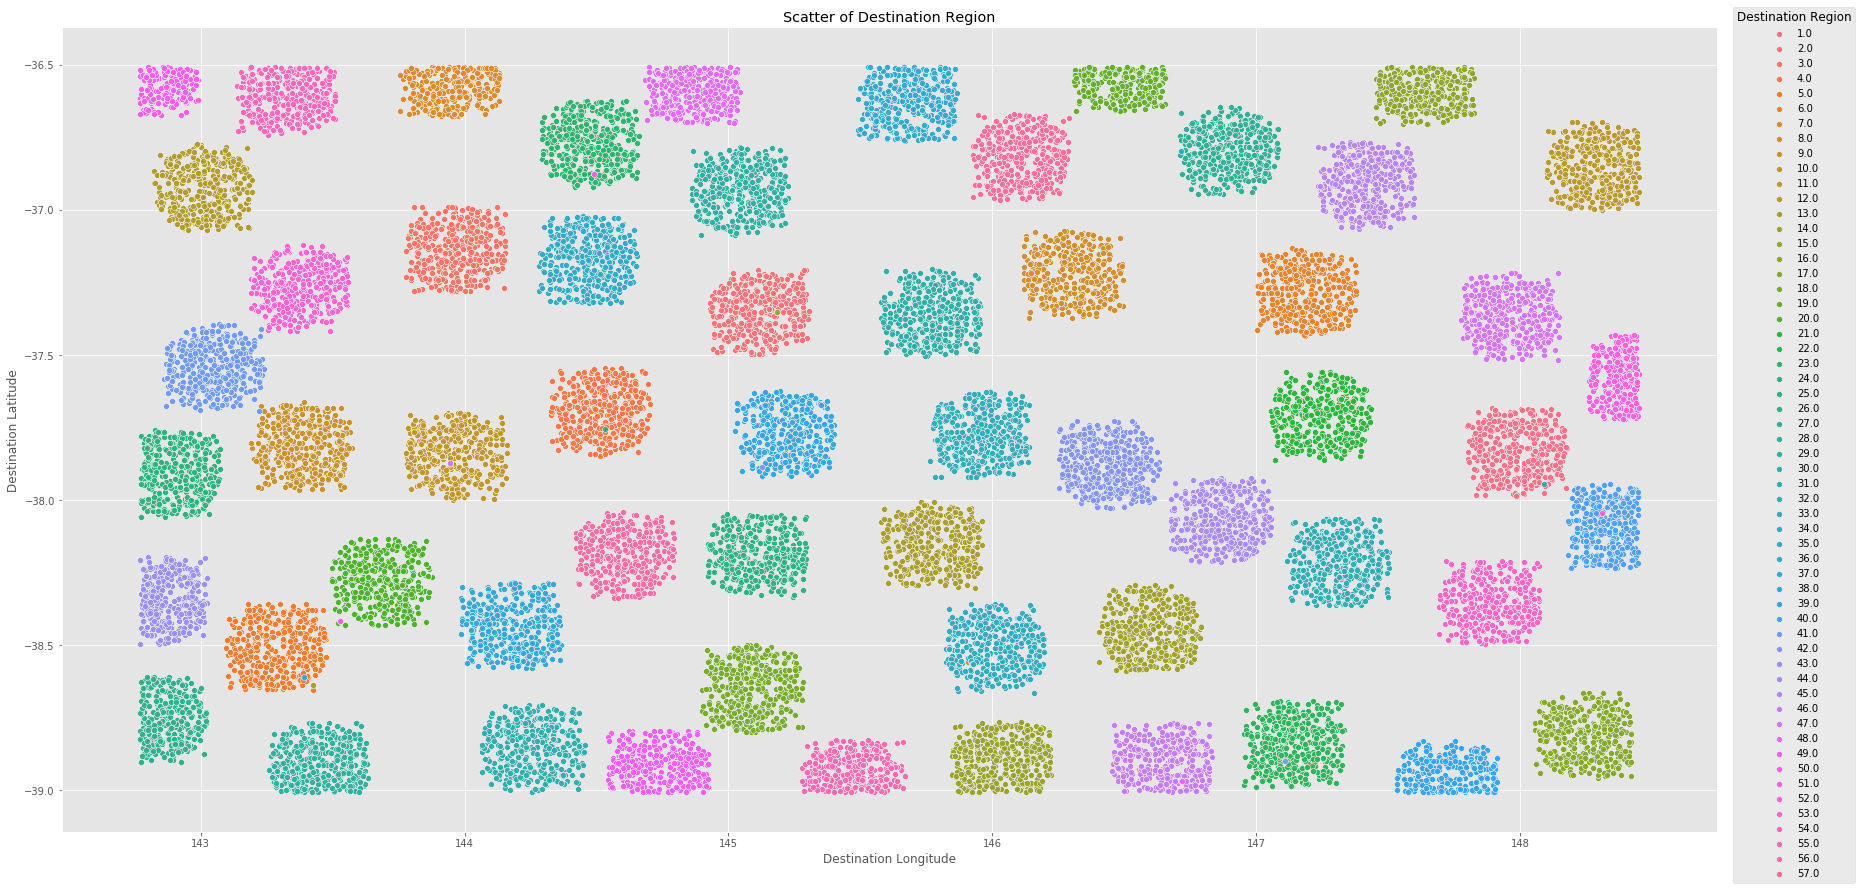

In [257]:
plt.figure()
sns.pairplot(
    x_vars="Destination Longitude",
    y_vars="Destination Latitude",
    data=df,
    hue="Destination Region",
    size=12,aspect=2)
plt.title("Scatter of Destination Region")

Text(0.5,1,'Scatter of Origin Region')

<Figure size 1080x576 with 0 Axes>

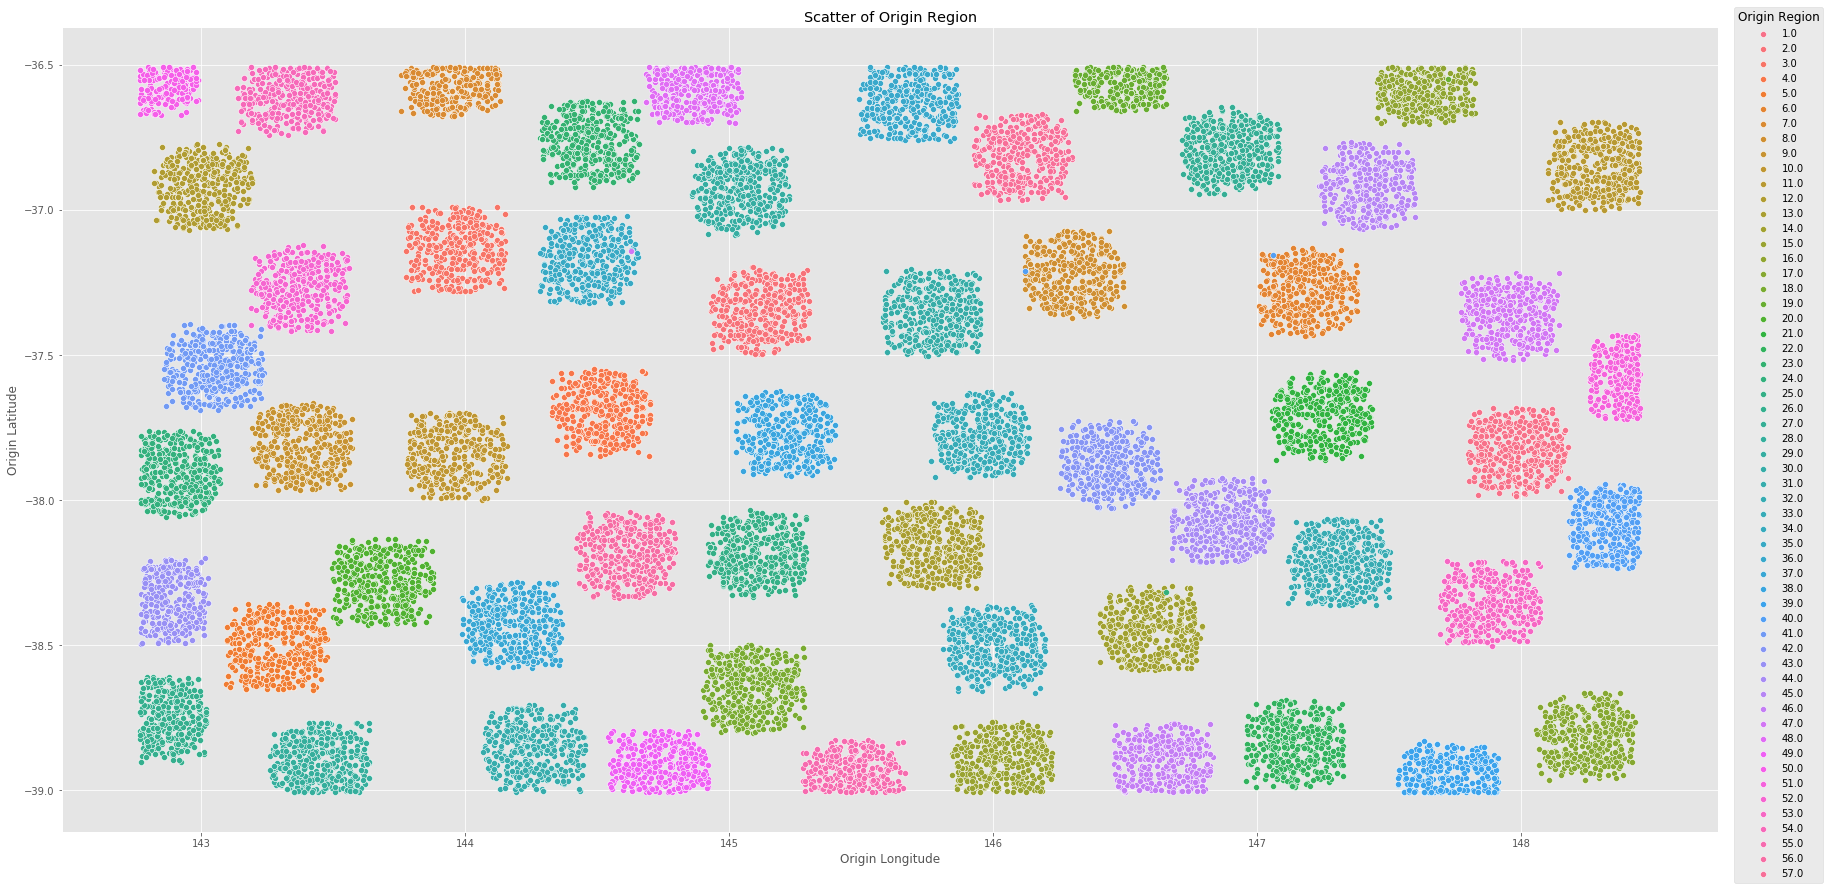

In [258]:
plt.figure()
sns.pairplot(
    x_vars="Origin Longitude",
    y_vars="Origin Latitude",
    data=df,
    hue="Origin Region",
    size=12, aspect=2)
plt.title("Scatter of Origin Region")

From the plots above, we can find that few wrong values in both `Origin Region` and `Destination Region`. Take a deeper insight using boxplot from a new dataframe integrating `Origin Region` and `Destination Region` with coordinates.

First, integrate all the regions and its coordinates from `Origin Region` and `Destination Region`.

In [259]:
origin = df[["Origin Latitude", "Origin Longitude", "Origin Region"]]
origin.columns = ["Latitude", "Longitude", "Region"]

In [260]:
destination = df[[
    "Destination Latitude", "Destination Longitude", "Destination Region"
]]
destination.columns = ["Latitude", "Longitude", "Region"]

A new dataframe with 3 columns `Region`, `Latitude` and `Longitude` is created. IQR is calculated based on this dataframe.

In [261]:
region_coord = pd.concat(
    [origin, destination], ignore_index=True)  # Concat data toghther

Draw boxplot of this new dataframe, detecting outliers.

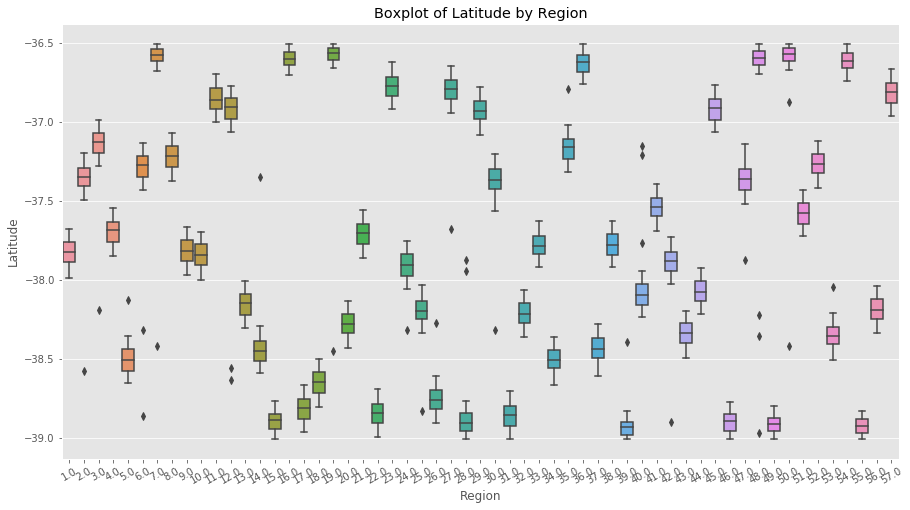

In [262]:
plt.figure()
fig = sns.boxplot(x="Region", y="Latitude", data=region_coord)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
plt.title("Boxplot of Latitude by Region")
plt.show()

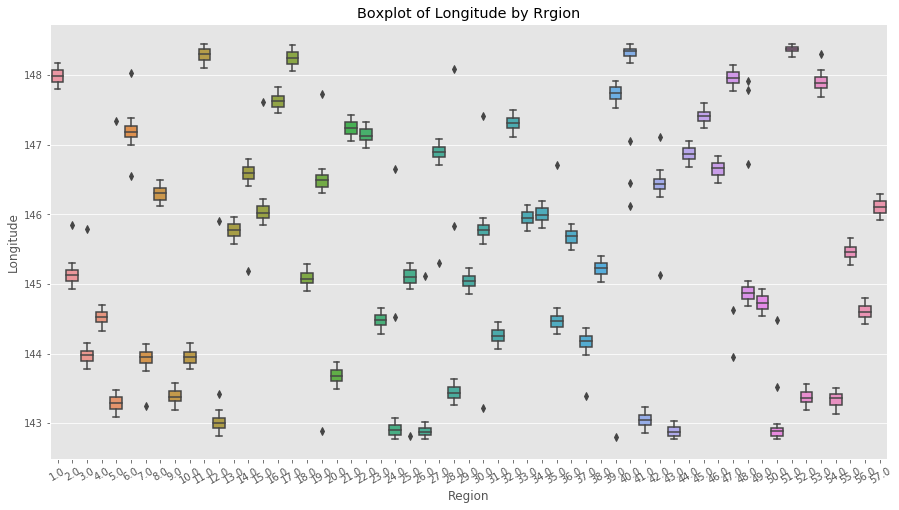

In [263]:
plt.figure()
fig = sns.boxplot(x="Region", y="Longitude", data=region_coord)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
plt.title("Boxplot of Longitude by Rrgion")
plt.show()

From the plots above, we can find that few wrong values in regions. To fix missing values and wrong values, we can use IQR to find all the outliers in each region, setting them as `NaN`. Find the median `Longitude` and `Latitude` of each region as the center of this region. Calculate the distance of all centers for each null in region, the closed center is the correct region that it should sit in.

In [264]:
# Calculate the IQR
IQR = (region_coord.groupby("Region")["Latitude", "Longitude"].quantile(0.75) -
       region_coord.groupby("Region")["Latitude", "Longitude"]
       .quantile(0.25)).apply(lambda x: 1.5 * x)

In [265]:
upper_bound = region_coord.groupby("Region")["Latitude", "Longitude"].quantile(
    0.75) + IQR

In [266]:
lower_bound = region_coord.groupby("Region")["Latitude", "Longitude"].quantile(
    0.25) - IQR

Then, find the wrong values in region, set these as `NaN`.

In [267]:
def filt_region(location):
    # If the value is missing, keep it.
    if np.isnan(location[2]):
        return location[2]
    else:
        region = int(location[2]) - 1
        # If the coordinate is lower than the lower bound or upper than the upper bound, set as NaN
        if location[0] < lower_bound.iloc[region,
                                          0] or location[1] < lower_bound.iloc[region,
                                                                               1] or location[0] > upper_bound.iloc[region,
                                                                                                                    0] or location[1] > upper_bound.iloc[region,
                                                                                                                                                         1]:
            return np.NaN
        # Keep the right values
        else:
            return location[2]

In [268]:
region_coord["filted_region"] = region_coord.apply(filt_region, axis=1)

In [269]:
region_coord["filted_region"].isnull().sum()

58

Find the centers for each regions.

In [270]:
centers = region_coord[~(region_coord["filted_region"].isnull())].groupby(
    "Region")["Latitude", "Longitude"].quantile()

Finally, fix the values by find the lowest distance.

In [271]:
def find_region(location):
    distance_list = []
    # Set the coordinates list of null regions and each center
    for i in centers.index.values:
        coord_list = [
            location["Latitude"], location["Longitude"],
            centers.at[i, "Latitude"], centers.at[i, "Longitude"]
        ]
        # Call function to calculate the distance
        distance_list.append(get_distance(coord_list))
    # Find the region using the lowest distance
    index = distance_list.index(np.min(distance_list))
    return index + 1

In [272]:
region_coord.loc[region_coord[
    "filted_region"].isnull(), "Region"] = region_coord.loc[region_coord[
        "filted_region"].isnull(), ["Latitude", "Longitude"]].apply(
            find_region, axis=1)

Check the data after cleanning.

In [273]:
# Calculate the IQR
IQR = (region_coord.groupby("Region")["Latitude", "Longitude"].quantile(0.75) -
       region_coord.groupby("Region")["Latitude", "Longitude"]
       .quantile(0.25)).apply(lambda x: 1.5 * x)

In [274]:
upper_bound = region_coord.groupby("Region")["Latitude", "Longitude"].quantile(
    0.75) + IQR

In [275]:
lower_bound = region_coord.groupby("Region")["Latitude", "Longitude"].quantile(
    0.25) - IQR

In [276]:
region_coord["filted_region"] = region_coord.apply(filt_region, axis=1)

In [277]:
region_coord["filted_region"].isnull().sum()

0

<Figure size 1080x576 with 0 Axes>

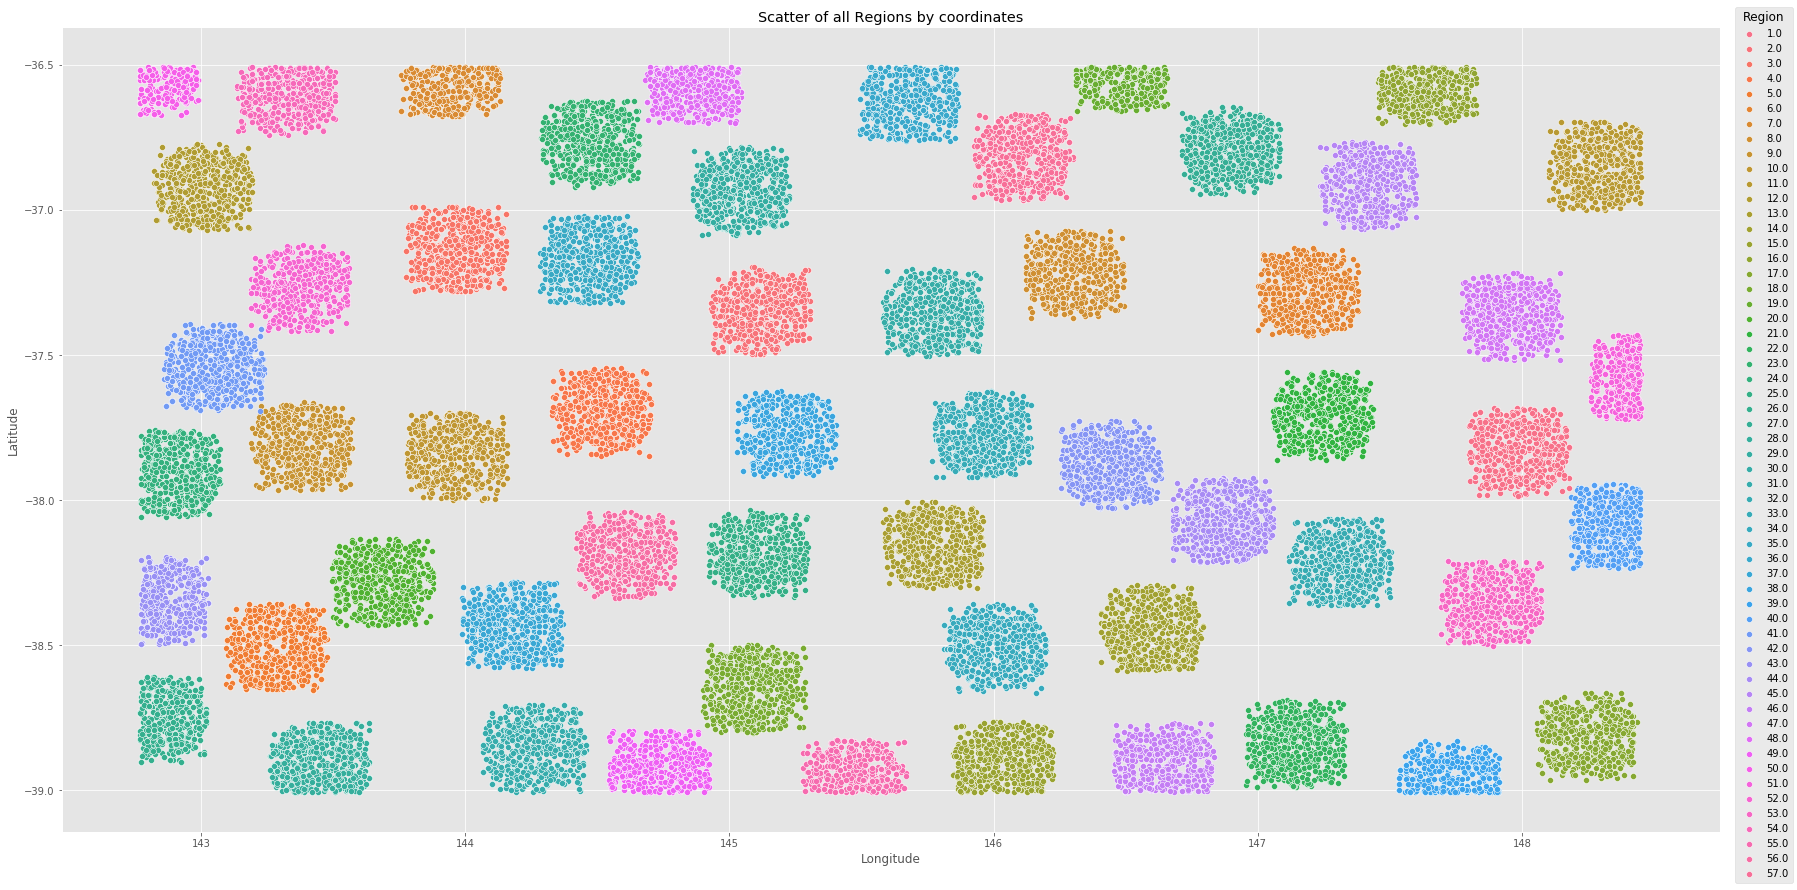

In [278]:
plt.figure()
sns.pairplot(
    x_vars="Longitude",
    y_vars="Latitude",
    data=region_coord,
    hue="Region",
    size=12,
    aspect=2)
plt.title("Scatter of all Regions by coordinates")
plt.show()

No outliers can be found. Now, change the original data with right values.

In [279]:
df["Origin Region"] = region_coord.loc[0:len(df) - 1, "Region"].values
df["Destination Region"] = region_coord.loc[len(df):len(df) * 2 -
                                            1, "Region"].values

### 4.7 Travel Time

The `Travel Time` can be calculated as `Delivery Time` - `Departure Time`. Thus we can fix the missing value by this method. Also, the calculated time can test the `Departure Time`.

Assume the unit is minutes. 

In [280]:
(df["Delivery Time"][0] - df["Departure Time"][0]).total_seconds() / 60

442.6666666666667

In [281]:
df["Travel Time"][0]

442.67

The assumption seems right, test all the dataset. Define a function to calculated the travel, store it in a column named `cal_travel_time`. Compare it with the original data.

In [282]:
def cal_travel_time(line):
    departure = line[0]
    arrival = line[1]
    if arrival > departure:
        cal_travel_time = (arrival - departure).total_seconds() / 60
    # For the cases that Delivery Time is less than Departure Time, it means the Delivery Time is in the next day.
    else:
        cal_travel_time = ((arrival - departure) +
                           pd.Timedelta("1 days")).total_seconds() / 60
    return round(cal_travel_time, 2)

In [283]:
df["cal_travel_time"] = df[["Departure Time", "Delivery Time"]].apply(
    cal_travel_time, axis=1)

In [284]:
abs(df["cal_travel_time"] - df["Travel Time"]).describe()

count    37336.000000
mean         1.202975
std         35.306006
min          0.000000
25%          0.000000
50%          0.010000
75%          0.010000
max       1414.590000
dtype: float64

<Figure size 1080x576 with 0 Axes>

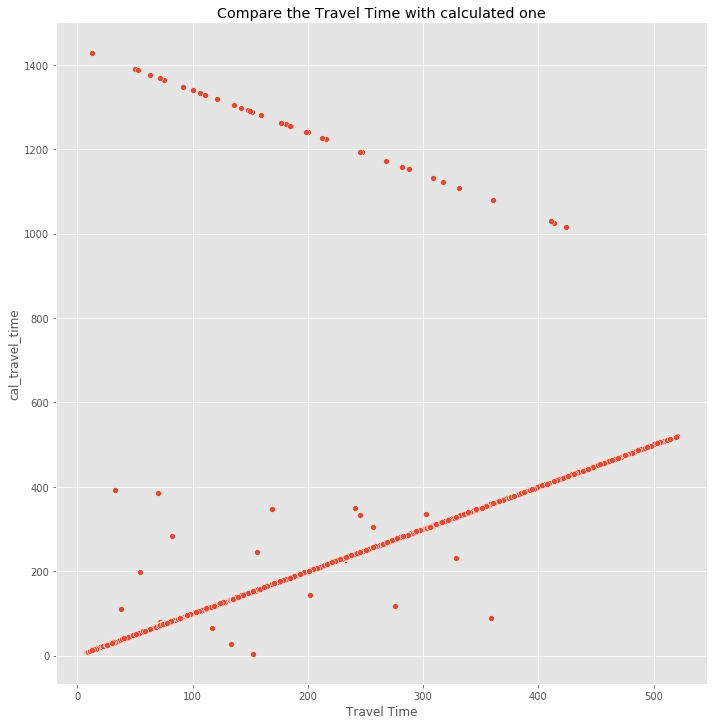

In [286]:
plt.figure()
sns.pairplot(x_vars="Travel Time", y_vars="cal_travel_time", data=df, size=10)
plt.title("Compare the Travel Time with calculated one")
plt.show()

Most of the data is correct which as shown is a diagnoal line. Also, there are some outliers.

Compare the `cal_travel_time` with original `Travel Time` with a difference of 0.02. As `round()` function can cause this error.

In [287]:
# Create a dataframe conatin the ouliters
temp_travel_time = df.loc[
    abs(df["cal_travel_time"] - df["Travel Time"]) > 0.02]
temp_travel_time[[
    "Journey Distance", "Departure Time", "Delivery Time", "Travel Time",
    "cal_travel_time"
]]

Journey Distance      Departure Time       Delivery Time  Travel Time  \
474              27.032 1900-01-01 15:52:33 1900-01-01 22:25:57        32.53   
482              81.494 1900-01-01 20:55:42 1900-01-01 01:40:08        82.07   
698             342.367 1900-01-01 13:02:38 1900-01-01 16:53:34       328.16   
2804            321.874 1900-01-01 09:02:42 1900-01-01 03:53:46       308.94   
2810             50.219 1900-01-01 00:47:44 1900-01-01 23:57:24        50.34   
2867            189.772 1900-01-01 10:05:44 1900-01-01 07:00:39       185.10   
3550            240.856 1900-01-01 02:37:43 1900-01-01 23:01:37       216.11   
4567             67.102 1900-01-01 23:34:08 1900-01-01 05:59:30        70.10   
4574             50.249 1900-01-01 10:19:58 1900-01-01 13:38:43        54.30   
4864            205.712 1900-01-01 13:18:44 1900-01-01 09:58:42       200.04   
4933            299.058 1900-01-01 13:16:53 1900-01-01 08:29:20       287.55   
6608            258.624 1900-01-01 09:14:45 1900-01-01 14:47:31       245.58   
6934            149.947 1900-01-01 18:29:01 1900-01-01 16:01:16       147.76   
6941            331.079 1900-01-01 13:43:32 1900-01-01 08:25:58       317.57   
6952             98.082 1900-01-01 01:23:11 1900-01-01 23:51:14        91.96   
8239            253.291 1900-01-01 19:23:49 1900-01-01 01:14:33       240.65   
9695             99.206 1900-01-01 18:06:10 1900-01-01 16:25:59       100.19   
10701           158.931 1900-01-01 10:06:56 1900-01-01 14:13:25       156.19   
10711            72.239 1900-01-01 14:01:43 1900-01-01 12:46:49        74.91   
11056             5.886 1900-01-01 20:10:28 1900-01-01 19:57:46        12.71   
11071            49.447 1900-01-01 23:49:44 1900-01-01 22:57:15        52.49   
12078           203.692 1900-01-01 01:53:20 1900-01-01 22:35:11       198.15   
12739           309.309 1900-01-01 12:54:19 1900-01-01 14:52:00       275.63   
13130           382.959 1900-01-01 23:16:20 1900-01-01 17:15:59       360.35   
13131           112.723 1900-01-01 20:32:40 1900-01-01 18:41:46       110.90   
15162           105.795 1900-01-01 15:25:30 1900-01-01 13:39:08       106.37   
16841           265.683 1900-01-01 11:09:35 1900-01-01 16:14:03       256.27   
17171           188.401 1900-01-01 18:36:43 1900-01-01 15:35:58       180.75   
18912            74.444 1900-01-01 15:12:58 1900-01-01 16:32:06        71.40   
19189           143.543 1900-01-01 21:02:23 1900-01-01 18:40:38       141.76   
19195           255.629 1900-01-01 02:29:09 1900-01-01 22:22:19       246.84   
19276           181.171 1900-01-01 01:22:06 1900-01-01 22:25:04       177.04   
20932           145.753 1900-01-01 18:45:05 1900-01-01 19:13:36       133.41   
21251           121.597 1900-01-01 04:18:35 1900-01-01 02:17:25       121.18   
21314           148.185 1900-01-01 22:49:37 1900-01-01 20:34:06       135.52   
21315           156.552 1900-01-01 13:39:07 1900-01-01 11:07:46       151.36   
23001           433.496 1900-01-01 08:10:34 1900-01-01 01:16:59       413.59   
23306           292.856 1900-01-01 10:42:45 1900-01-01 06:01:01       281.74   
24021           345.570 1900-01-01 02:29:47 1900-01-01 20:58:38       331.16   
25042           207.348 1900-01-01 17:01:48 1900-01-01 19:25:13       201.58   
25339           117.379 1900-01-01 11:48:29 1900-01-01 12:54:22       117.23   
25345           258.667 1900-01-01 11:09:09 1900-01-01 07:03:32       245.62   
25359           282.302 1900-01-01 19:05:16 1900-01-01 14:37:51       267.43   
25378           437.432 1900-01-01 08:30:28 1900-01-01 01:39:51       410.63   
25382            61.185 1900-01-01 17:02:00 1900-01-01 15:58:41        63.32   
25388           120.172 1900-01-01 14:32:42 1900-01-01 12:41:33       111.16   
27103           240.235 1900-01-01 21:06:49 1900-01-01 00:54:06       232.41   
27420           192.305 1900-01-01 22:35:38 1900-01-01 19:31:17       184.36   
27439           161.901 1900-01-01 00:24:16 1900-01-01 21:45:18       158.97   
31179  

The difference of these rows are large, these are the wrong values.

<Figure size 1080x576 with 0 Axes>

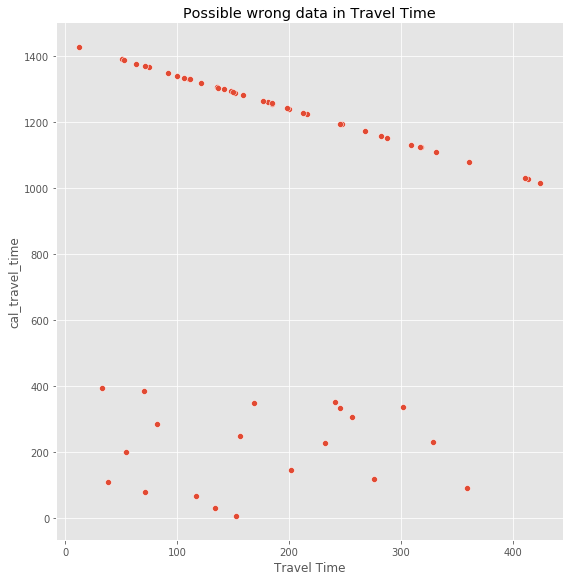

In [288]:
plt.figure()
sns.pairplot(
    x_vars="Travel Time",
    y_vars="cal_travel_time",
    data=temp_travel_time,
    size=8)
plt.title("Possible wrong data in Travel Time")
plt.show()

From above plot, the `cal_travel_time` can be divided into two part.

For the `cal_travel_time` larger than 500, it seems that the `Delivery Time` and `Departure Time` is in wrong position.

Test the assumption, calculate the difference of `cal_travel_time` with original data after change the position of `Delivery Time` and `Departure Time`.

In [289]:
temp_travel_time.loc[temp_travel_time["cal_travel_time"] > 500, [
    "Delivery Time", "Departure Time"
]].apply(
    cal_travel_time,
    axis=1) - temp_travel_time.loc[temp_travel_time["cal_travel_time"] > 500,
                                   "Travel Time"]

2804    -0.01
2810    -0.01
2867    -0.02
3550    -0.01
4864    -0.01
4933     0.00
6934    -0.01
6941     0.00
6952    -0.01
9695    -0.01
10711   -0.01
11056   -0.01
11071   -0.01
12078    0.00
13130    0.00
13131    0.00
15162    0.00
17171    0.00
19189   -0.01
19195   -0.01
19276   -0.01
21251   -0.01
21314    0.00
21315   -0.01
23001   -0.01
23306   -0.01
24021   -0.01
25345    0.00
25359   -0.01
25378   -0.01
25382    0.00
25388   -0.01
27420   -0.01
27439    0.00
31328   -0.01
31525   -0.02
33533   -0.01
33572   -0.01
34261   -0.01
34471   -0.01
dtype: float64

The error is acceptable, the assumption is right. Fix the wrong data in original data.

In [290]:
df.loc[temp_travel_time.loc[temp_travel_time["cal_travel_time"] > 500].index.
       values, ["Departure Time", "Delivery Time"]] = temp_travel_time.loc[
           temp_travel_time["cal_travel_time"] > 500,
           ["Delivery Time", "Departure Time"]].values

Check the rest part in `temp_travel_time`.

In [291]:
temp_travel_time.loc[temp_travel_time["cal_travel_time"] <= 500, [
    "Drone Type", "Post Type", "Journey Distance", "cal_distance",
    "Departure Time", "Delivery Time", "Travel Time", "cal_travel_time",
    "Delivery Fare"
]]

Drone Type  Post Type  Journey Distance  cal_distance  \
474           1.0        1.0            27.032        27.032   
482           2.0        0.0            81.494        81.494   
698           1.0        0.0           342.367       342.367   
4567          1.0        0.0            67.102        67.102   
4574          1.0        0.0            50.249        50.249   
6608          2.0        1.0           258.624       258.624   
8239          2.0        1.0           253.291       253.291   
10701         1.0        1.0           158.931       158.931   
12739         3.0        0.0           309.309       309.309   
16841         1.0        1.0           265.683       265.683   
18912         3.0        0.0            74.444        74.444   
20932         3.0        0.0           145.753       145.753   
25042         1.0        0.0           207.348       207.348   
25339         1.0        1.0           117.379       117.379   
27103         1.0        0.0           240.235       240.235   
31179         2.0        0.0           381.755       381.755   
31187         2.0        0.0            33.694        33.694   
33241         1.0        0.0           172.358       172.358   
35285         3.0        0.0           167.620       167.620   
35286         1.0        0.0           314.561       314.561   

           Departure Time       Delivery Time  Travel Time  cal_travel_time  \
474   1900-01-01 15:52:33 1900-01-01 22:25:57        32.53           393.40   
482   1900-01-01 20:55:42 1900-01-01 01:40:08        82.07           284.43   
698   1900-01-01 13:02:38 1900-01-01 16:53:34       328.16           230.93   
4567  1900-01-01 23:34:08 1900-01-01 05:59:30        70.10           385.37   
4574  1900-01-01 10:19:58 1900-01-01 13:38:43        54.30           198.75   
6608  1900-01-01 09:14:45 1900-01-01 14:47:31       245.58           332.77   
8239  1900-01-01 19:23:49 1900-01-01 01:14:33       240.65           350.73   
10701 1900-01-01 10:06:56 1900-01-01 14:13:25       156.19           246.48   
12739 1900-01-01 12:54:19 1900-01-01 14:52:00       275.63           117.68   
16841 1900-01-01 11:09:35 1900-01-01 16:14:03       256.27           304.47   
18912 1900-01-01 15:12:58 1900-01-01 16:32:06        71.40            79.13   
20932 1900-01-01 18:45:05 1900-01-01 19:13:36       133.41            28.52   
25042 1900-01-01 17:01:48 1900-01-01 19:25:13       201.58           143.42   
25339 1900-01-01 11:48:29 1900-01-01 12:54:22       117.23            65.88   
27103 1900-01-01 21:06:49 1900-01-01 00:54:06       232.41           227.28   
31179 1900-01-01 21:58:19 1900-01-01 23:27:50       359.24            89.52   
31187 1900-01-01 14:57:40 1900-01-01 16:47:18        37.95           109.63   
33241 1900-01-01 03:32:24 1900-01-01 09:19:29       168.77           347.08   
35285 1900-01-01 22:28:54 1900-01-01 22:33:04       152.42             4.17   
35286 1900-01-01 22:44:00 1900-01-01 04:18:37       302.09           334.62   

       Delivery Fare  
474           129.93  
482           136.19  
698           120.86  
4567          110.45  
4574           80.26  
6608          158.31  
8239          184.48  
10701         118.79  
12739         195.43  
16841         128.99  
18912         171.27  
20932         175.43  
25042         104.17  
25339         115.00  
27103         128.88  
31179         176.94  
31187         130.71  
33241         126.13  
35285         192.03  
35286         136.56

According to the rough speed which can be calculated as `Journey Distance` divide `Travel Time`, the original `Travel Time` should be right. Also, the duplicaed `Id` checked before demonastrates that the `Delivery Time` contains wrong data.

In [292]:
df[df["Id"].duplicated(keep=False)]

Id  Drone Type  Post Type  Package Weight  Origin Region  \
16841  ID5355736242         1.0        1.0          20.762           20.0   
37375  ID5355736242         1.0        1.0          20.762           20.0   

       Destination Region  Origin Latitude  Origin Longitude  \
16841                 8.0       -38.427387        143.696334   
37375                 8.0       -38.427387        143.696334   

       Destination Latitude  Destination Longitude  Journey Distance  \
16841            -37.178341             146.270579           265.683   
37375            -37.178341             146.270579           265.683   

      Departure Date      Departure Time  Travel Time       Delivery Time  \
16841     2018-05-28 1900-01-01 11:09:35       256.27 1900-01-01 16:14:03   
37375     2018-05-28 1900-01-01 11:09:35       256.27 1900-01-01 15:25:51   

       Delivery Fare  cal_distance  cal_travel_time  
16841         128.99       265.683           304.47  
37375         128.99       265.683           256.27

Fix the `Delivery Time` using `Departure Time` + `Travel Time`.

In [293]:
def fix_delivery_time(row):
    delivery_time = row["Departure Time"] + timedelta(
        seconds=round((row["Travel Time"]) * 60, 0))
    return delivery_time

In [294]:
df.loc[temp_travel_time.loc[temp_travel_time["cal_travel_time"] <= 500]
       .index.values, "Delivery Time"] = df.loc[temp_travel_time.loc[
           temp_travel_time["cal_travel_time"] <= 500].index.values].apply(
               fix_delivery_time, axis=1)

Now, the duplicated `Id` should also be duplicated rows, remove the duplicated.

In [295]:
df[df.loc[:, "Id":"Delivery Fare"].duplicated(keep=False)]

Id  Drone Type  Post Type  Package Weight  Origin Region  \
16841  ID5355736242         1.0        1.0          20.762           20.0   
37375  ID5355736242         1.0        1.0          20.762           20.0   

       Destination Region  Origin Latitude  Origin Longitude  \
16841                 8.0       -38.427387        143.696334   
37375                 8.0       -38.427387        143.696334   

       Destination Latitude  Destination Longitude  Journey Distance  \
16841            -37.178341             146.270579           265.683   
37375            -37.178341             146.270579           265.683   

      Departure Date      Departure Time  Travel Time       Delivery Time  \
16841     2018-05-28 1900-01-01 11:09:35       256.27 1900-01-01 15:25:51   
37375     2018-05-28 1900-01-01 11:09:35       256.27 1900-01-01 15:25:51   

       Delivery Fare  cal_distance  cal_travel_time  
16841         128.99       265.683           304.47  
37375         128.99       265.683           256.27

In [296]:
df.drop(df[df.loc[:, "Id":"Delivery Fare"].duplicated()].index, inplace=True)
df.reset_index(inplace=True, drop=True)

Check the missing values in `Travel Time`.

In [297]:
df[df["Travel Time"].isnull()]

Id  Drone Type  Post Type  Package Weight  Origin Region  \
85     ID1930427839         1.0        0.0          19.318           47.0   
90     ID5565819100         1.0        1.0          31.800           43.0   
108    ID1200922772         2.0        0.0          50.724            4.0   
416    ID1696704925         1.0        0.0          45.773           27.0   
2132   ID1817283102         3.0        0.0          17.186           28.0   
3088   ID1880372355         1.0        0.0          42.353           49.0   
3145   ID1984951469         3.0        0.0          31.043           45.0   
4528   ID1156073242         1.0        0.0          47.347           44.0   
6155   ID1547757304         1.0        0.0          27.413           43.0   
6217   ID1856405448         1.0        0.0          17.195           25.0   
8285   ID1471836312         2.0        0.0          38.168            2.0   
8614   ID5608360101         2.0        1.0          30.688           36.0   
8663   ID1586814377         2.0        0.0          44.989           10.0   
10312  ID5221356738         3.0        1.0           6.611            4.0   
10668  ID1125734974         1.0        0.0          43.732           48.0   
10669  ID1749496539         3.0        0.0          32.578           52.0   
10671  ID1132834669         1.0        0.0          31.195           52.0   
10673  ID1192409273         1.0        0.0          48.956           39.0   
11960  ID1877830776         3.0        0.0          32.557           41.0   
14748  ID1627769551         3.0        0.0          31.643           52.0   
14773  ID1231243198         2.0        0.0           5.047           36.0   
16458  ID5680235327         3.0        1.0           7.587           25.0   
16472  ID1328855284         3.0        0.0          40.990           39.0   
18507  ID5424541543         2.0        1.0          25.206           49.0   
18880  ID1816860269         1.0        0.0          44.396           54.0   
19314  ID5500414776         1.0        1.0          17.451           35.0   
20893  ID5197202563         2.0        1.0          50.237           52.0   
22635  ID1240958859         1.0        0.0          25.213           45.0   
22942  ID5750613424         3.0        1.0          47.687           25.0   
22963  ID1743914813         1.0        0.0          58.299           56.0   
23968  ID1851133109         1.0        0.0          20.254           10.0   
26395  ID1795112769         2.0        0.0          26.636           53.0   
26704  ID1855300313         1.0        0.0          26.956           26.0   
26723  ID5512725907         1.0        1.0          26.277           40.0   
26733  ID1793119576         1.0        0.0          26.002           37.0   
27045  ID5947378811         2.0        1.0          33.765           48.0   
27067  ID1133091354         2.0        0.0          48.938           20.0   
31147  ID1671400221         3.0        0.0          27.280            7.0   
34893  ID5243554451         3.0        1.0          24.133           36.0   
37290  ID1242965157         1.0        0.0           6.483           11.0   

       Destination Region  Origin Latitude  Origin Longitude  \
85                   39.0       -37.263880        147.974077   
90                   46.0       -38.269203        142.888178   
108                  54.0       -37.739464        144.507133   
416                   3.0       -36.687209        147.007573   
2132                 55.0       -38.945731        143.467841   
3088                 36.0       -38.830971        144.685718   
3145                 19.0       -36.973018        147.347216   
4528                 38.0       -38.065159        146.702030   
6155                 34.0       -38.321349        142.835315   
6217                 12.0       -38.180379        145.100872   
8285                  5.0       -37.305174        145.041395   
8614                 28.0       -36.642547        145.681203   
8663                 41.0  

Using rough speed, the `cal_travel_time` seems correct,so we can impute the missing values with `cal_travel_time`. However, it still needs to be cross validate by speed, keep these values. The same with the method to fix the `Delivery Time`.

In [298]:
invalid_travel_time = pd.concat([
    temp_travel_time.loc[(temp_travel_time["cal_travel_time"] <= 500)],
    df.loc[df["Travel Time"].isnull()]
])
len(invalid_travel_time)

60

In [299]:
df.loc[df["Travel Time"].isnull(), "Travel Time"] = df.loc[df[
    "Travel Time"].isnull(), "cal_travel_time"]

Check the data again.

In [300]:
df["cal_travel_time"] = df[["Departure Time", "Delivery Time"]].apply(
    cal_travel_time, axis=1)
df.loc[abs(df["cal_travel_time"] - df["Travel Time"]) > 0.02,
       ["Travel Time", "cal_travel_time"]]

Empty DataFrame
Columns: [Travel Time, cal_travel_time]
Index: []

<Figure size 1080x576 with 0 Axes>

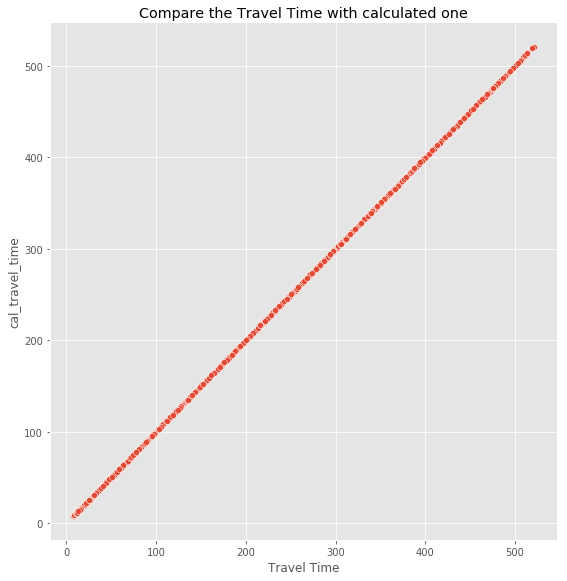

In [302]:
plt.figure()
sns.pairplot(x_vars="Travel Time", y_vars="cal_travel_time", data=df, size=8)
plt.title("Compare the Travel Time with calculated one")
plt.show()

The calculated travel time matches the original data.

### 4.8 Drone Type

For each drone type, we know that there are three different speed: takeoff speed, travel speed and landing speed. Also, the landing and takeoff takes 5 minutes each. Assuming takeoff speed + landing speed as $x$ and travel speed as $y$ Using $$ 5 \times x + (traveltime - 10)\times y= journey distance$$, we can calculate the travel speed of each drone type.

Change the equation, we can find that $$ journeydistance = y \times travel time + 5\times x - 10\times y$$
which is equivalent to $$ journey distance = a \times travel time + b$$ where $a=travel speed$ as coefficient.

Based on this, we can using linear regression to find out the relation between `Journey Distance` and `Travel Time` for each `Drone Type`, fixing the wrong and missing values in this column. Also, cross validate the `Travel Time` to fix the errors.  

<Figure size 1080x576 with 0 Axes>

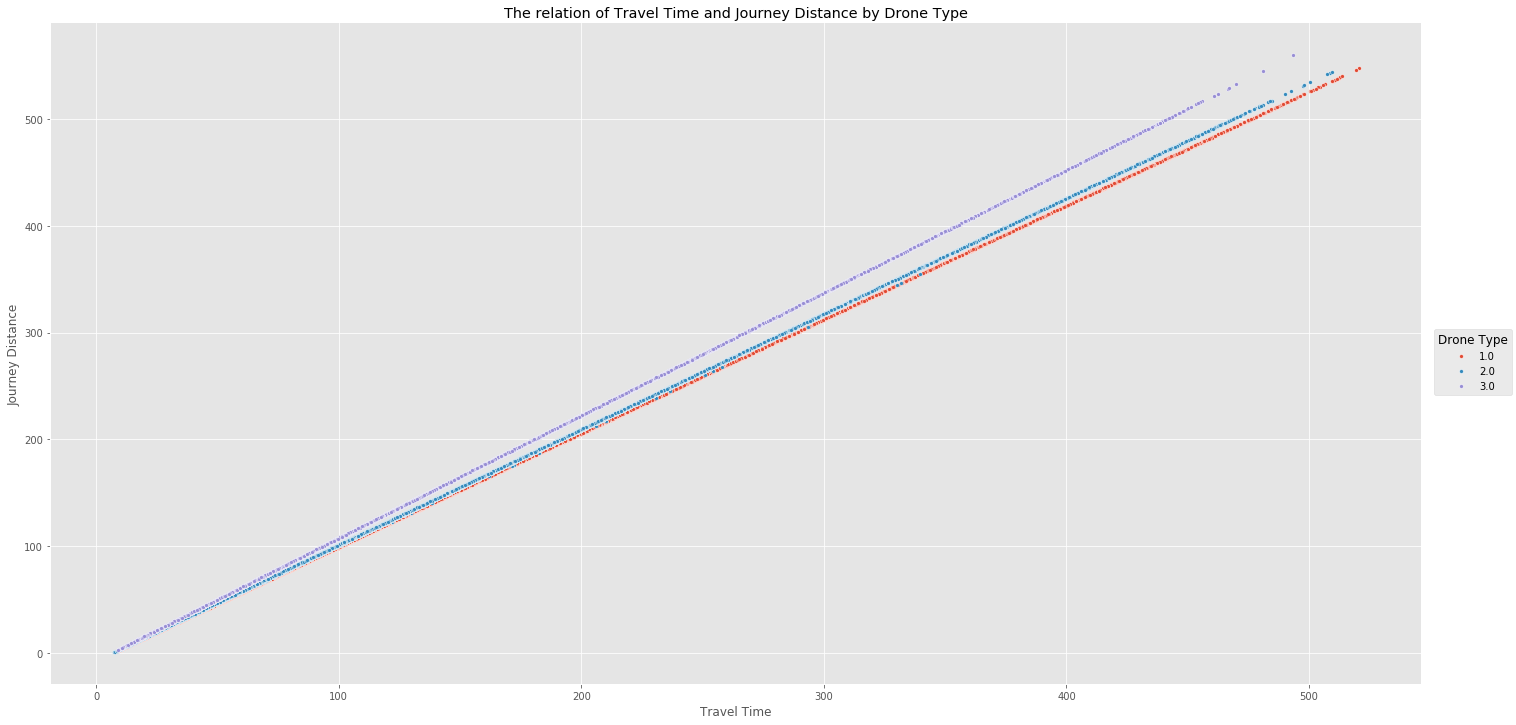

In [304]:
plt.figure()
sns.pairplot(
    x_vars="Travel Time",
    y_vars="Journey Distance",
    hue="Drone Type",
    data=df,
    size=10,
    aspect=2,
    plot_kws={"s": 15})
plt.title("The relation of Travel Time and Journey Distance by Drone Type")
plt.show()

As shown in the figure, some wrong types can be found in type 1 and 2. Build the regressions with each type.

In [305]:
# Exclude the rows that Travel Time is uncertain
valid_travel_time = df.loc[~(df.index.isin(invalid_travel_time.index.values))]

In [306]:
# Build the linear regression
def build_model(data):
    # Create dataset
    X = (data["Travel Time"] / 60.0).values
    y = data["Journey Distance"].values
    reg = LinearRegression()
    X = X.reshape(-1, 1)
    reg.fit(X, y)
    # Make prediction
    y_pred = reg.predict(X)
    # Compute and print R^2 and MSE
    print("R squared: {}".format(reg.score(X, y)))
    mse = mean_squared_error(y_pred, y)
    print("Mean Squared Error: {}".format(mse))
    data["predict_distance"] = reg.predict(X)
    data["residual"] = data["predict_distance"] - data["Journey Distance"]
    return reg

In [307]:
reg_list = []
invalid_type_index = []
speed_list = []
for type in [1, 2, 3]:
    temp = valid_travel_time.loc[valid_travel_time["Drone Type"] == float(
        type)]
    # Build the model of each type
    build_model(temp)
    # Exclude the wrong types in each Drone Type by residuals
    valid_temp = temp.loc[
        (temp["residual"] > temp["residual"].quantile(0.25) - 1.5 *
         (temp["residual"].quantile(0.75) - temp["residual"].quantile(0.25)))
        &
        (temp["residual"] < temp["residual"].quantile(0.75) + 1.5 *
         (temp["residual"].quantile(0.75) - temp["residual"].quantile(0.25)))]
    print("The number of invalid types in Type", type, "is",
          len(temp.loc[~(temp.index.isin(valid_temp.index.values))]))
    # Rebuild the model
    reg = build_model(valid_temp)
    # Find the travel speed and intercept
    speed_list.append([round(reg.coef_[0], 4), reg.intercept_])
    # Add index of rows that contain wrong value in Drone Type
    invalid_type_index.extend(temp.loc[
        ~(temp.index.isin(valid_temp.index.values))].index.values.tolist())
    reg_list.append(reg)

R squared: 0.9999867966371649
Mean Squared Error: 0.16697938045764954


C:\Users\gy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\gy\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The number of invalid types in Type 1 is 58
R squared: 0.9999999992409296
Mean Squared Error: 9.486411985737875e-06
R squared: 0.9999794876482764
Mean Squared Error: 0.2576137666187192
The number of invalid types in Type 2 is 46
R squared: 0.9999999992110928
Mean Squared Error: 9.82747520685436e-06
R squared: 0.9999999990965456
Mean Squared Error: 1.1138380530790393e-05
The number of invalid types in Type 3 is 0
R squared: 0.9999999990965456
Mean Squared Error: 1.1138380530790393e-05


In [308]:
speed_list

[[64.0, -7.666771911857353],
 [65.0, -7.4166701221369635],
 [69.0, -7.666651938476633]]

We can confirm that wrong values in Drone Type 1 and 2, also the models are perfectly fitted after rebuilt. Now, we only need to focus on the wrong types found. For the wrong types, we firstly calculate the difference between `Travel Time` using all the types speed. Then find the lowest difference, checking it.

In [309]:
def cal_time_diff(row):
    diff = []
    for i in range(0, len(speed_list)):
        time = (
            row["Journey Distance"] - speed_list[i][1]) * 60 / speed_list[i][0]
        diff.append(abs(row["Travel Time"] - time))
    return np.min(diff)

In [310]:
invalid_drone_type = df.loc[invalid_type_index]
invalid_drone_type["diff_time"] = invalid_drone_type.apply(
    cal_time_diff, axis=1)
invalid_drone_type["diff_time"].describe()

count    104.000000
mean       0.003326
std        0.001410
min        0.000099
25%        0.002252
50%        0.003716
75%        0.004462
max        0.005381
Name: diff_time, dtype: float64

As shown, the model build is matched with the data, then for the wrong types and missing types, the speed that the lowest difference in `Travel Time` calculated is the right speed, namely the right type.

In [311]:
def get_drone_type(row):
    diff = []
    for i in range(0, len(speed_list)):
        time = (
            row["Journey Distance"] - speed_list[i][1]) * 60 / speed_list[i][0]
        diff.append(round(abs(row["Travel Time"] - time), 2))
    drone_type = diff.index(np.min(diff)) + 1
    return float(drone_type)

In [312]:
# Fix the wrong value
df.loc[invalid_type_index, "Drone Type"] = df.loc[invalid_type_index].apply(
    get_drone_type, axis=1)

# Fix the mising value
df.loc[df["Drone Type"].isnull(), "Drone Type"] = df[df["Drone Type"]
                                                     .isnull()].apply(
                                                         get_drone_type,
                                                         axis=1)

Now, validate the `Travel Time` in the invalid travel time dataframe.

In [313]:
def cal_time_by_type(row):
    type_list = [1.0, 2.0, 3.0]
    time = (row["Journey Distance"] - speed_list[type_list.index(
        row["Drone Type"])][1]) * 60 / speed_list[type_list.index(
            row["Drone Type"])][0]
    return round(time, 2)

In [314]:
(invalid_travel_time.apply(cal_time_by_type, axis=1) - df.loc[invalid_travel_time.index]["Travel Time"]).describe()

count    60.000000
mean      0.004500
std       0.005945
min       0.000000
25%       0.000000
50%       0.000000
75%       0.010000
max       0.020000
dtype: float64

The `Travel Time` fixed before is correct as the difference of calculated travel time by speed and distance is almost zero.

Check the data again.

In [315]:
df["Drone Type"].isnull().sum()

0

<Figure size 1080x576 with 0 Axes>

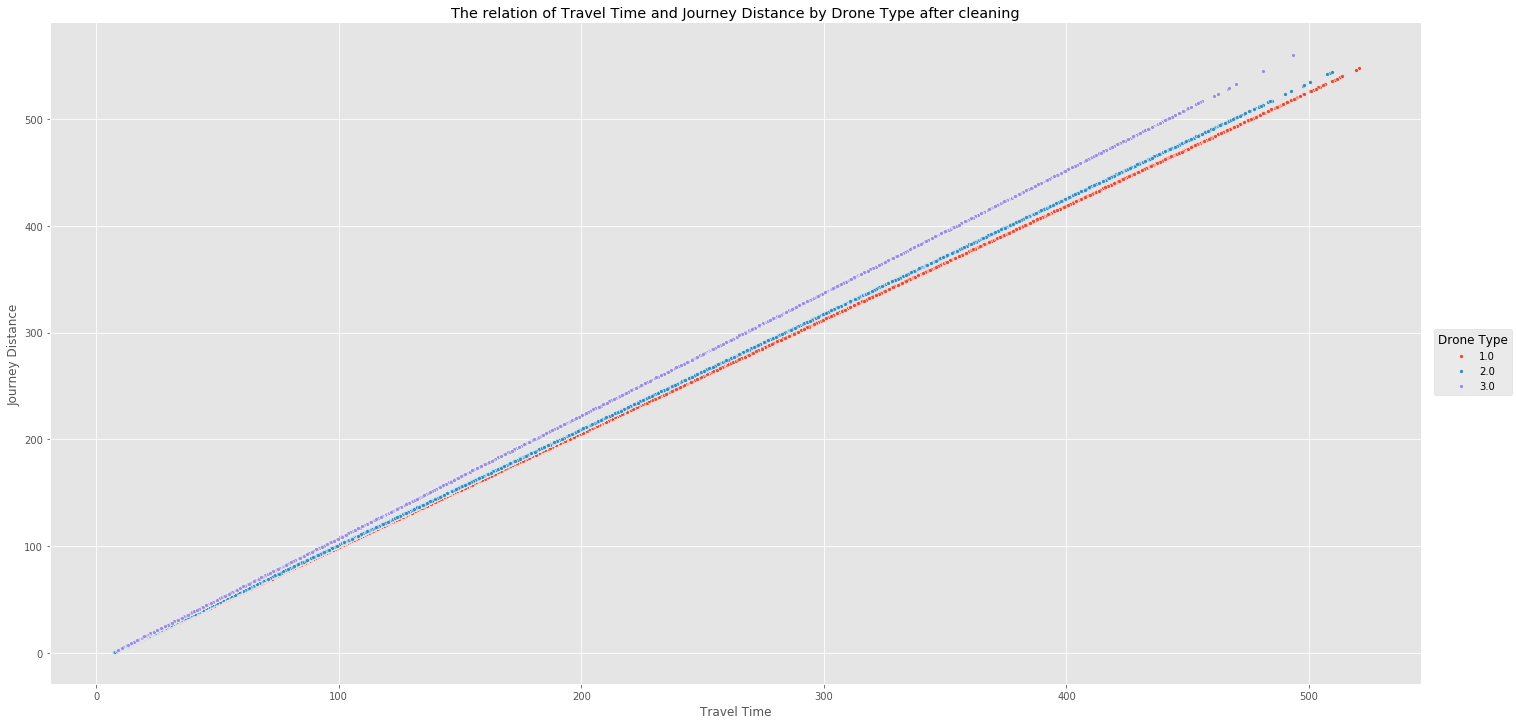

In [317]:
plt.figure()
sns.pairplot(
    x_vars="Travel Time",
    y_vars="Journey Distance",
    hue="Drone Type",
    data=df,
    size=10,
    aspect=2,
    plot_kws={"s": 15})
plt.title("The relation of Travel Time and Journey Distance by Drone Type after cleaning")
plt.show()

### 4.9 Post Type

It seems that the fist character of `Id` is associated with `Post Type`. For `Id` begin with 1, the `Post Type` is 0, for `Id` begin with 5, the `Post Type` is 1. Test it.

In [318]:
# Extract the first character of Id, store it in a new column.
df["id_begin"] = df["Id"].str.get(2)

In [319]:
# Test the assumption
df.groupby("id_begin")["Post Type"].value_counts()

id_begin  Post Type
1         0.0          26147
          1.0             16
5         1.0          11168
          0.0             24
Name: Post Type, dtype: int64

The data above confirm the assumption and we can fix the missing/wrong `Post Type` using the `id_begin`.

In [320]:
# Define a function to fix post type using the pattern found.
def fix_post_type(row):
    if row["id_begin"] == "1":
        return 0.0
    elif row["id_begin"] == "5":
        return 1.0

In [321]:
df["Post Type"] = df.apply(fix_post_type, axis=1)

Check the data after fixing.

In [322]:
df.groupby("id_begin")["Post Type"].value_counts()

id_begin  Post Type
1         0.0          26179
5         1.0          11196
Name: Post Type, dtype: int64

In [323]:
df["Post Type"].isnull().sum()

0

### 4.10 Delivery Fare

The delivery company has a specific rule to define morning (6:00:00 - 11:59:59), afternoon (12:00:00 - 20:59:59), and night (21:00 - 5:59:59). Assume 0 represents morning, 1 represents afternoon and 2 represents night.

In [324]:
def departure_time_class(departure_time):
    morning_lower = datetime.strptime("6:00:00", "%H:%M:%S")
    morning_upper = datetime.strptime("11:59:59", "%H:%M:%S")
    afternoon_lower = datetime.strptime("12:00:00", "%H:%M:%S")
    afternoon_upper = datetime.strptime("20:59:59", "%H:%M:%S")
    if morning_lower <= departure_time <= morning_upper:
        return 0
    elif afternoon_lower <= departure_time <= afternoon_upper:
        return 1
    else:
        return 2

In [325]:
df["departure_time_class"] = df["Departure Time"].apply(departure_time_class)

In [326]:
df.drop(columns=["cal_travel_time", "cal_distance", "id_begin"], inplace=True)

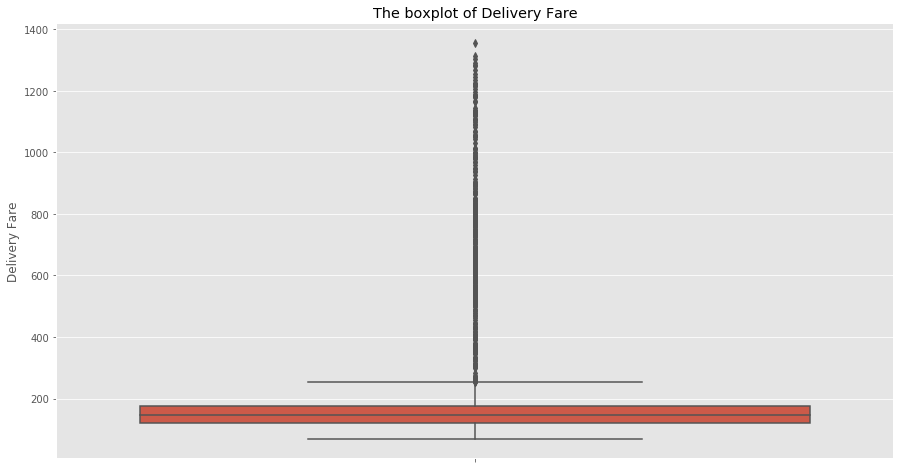

In [327]:
plt.figure()
sns.boxplot(y="Delivery Fare", data=df)
plt.title("The boxplot of Delivery Fare")
plt.show()

As shown, many outliers exist in this column, as it is already known that `Delivery Fare` has linear relation with some of the features, try to find out.

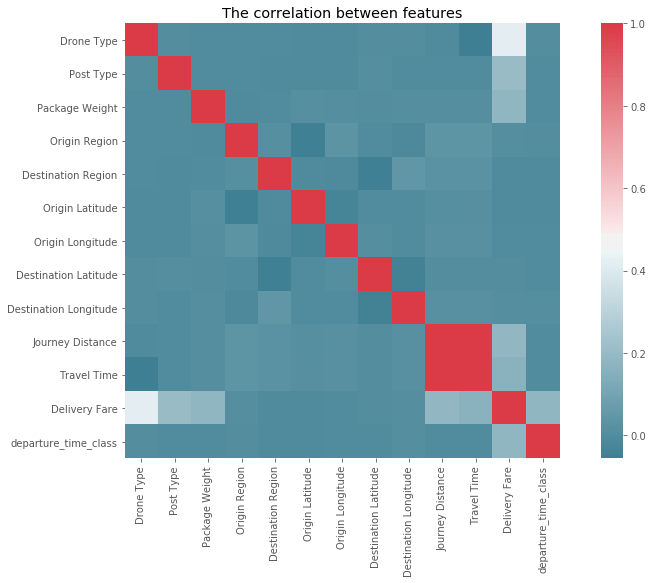

In [331]:
plt.figure()
sns.heatmap(
    df.corr(), square=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("The correlation between features")
plt.show()

From above correlation figure, `Delivery Fare` has relation of `Drone Type`, `Post Type`, `Package Weight`, `Journey Distance`, `Travel Time` and `departure_time_class`. As `Travel Time` is depended on `Drone Type` and `Journey Distance`, we can ignore this feature.

<Figure size 1080x576 with 0 Axes>

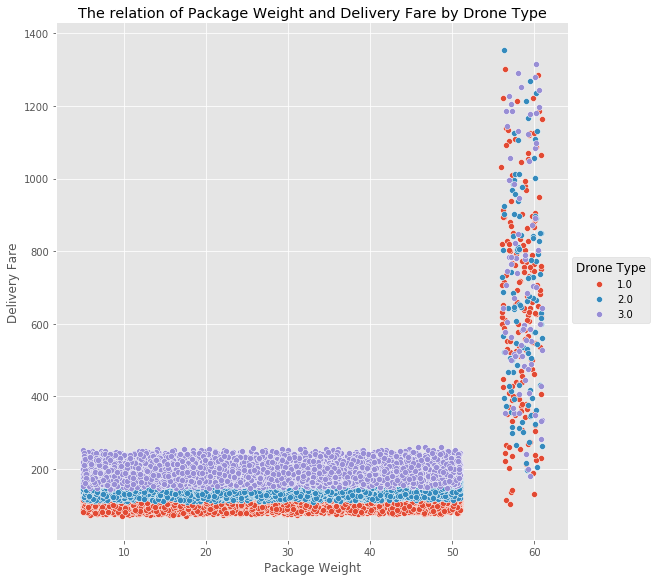

In [333]:
plt.figure()
sns.pairplot(
    x_vars="Package Weight",
    y_vars="Delivery Fare",
    data=df,
    hue="Drone Type",
    size=8)
plt.title("The relation of Package Weight and Delivery Fare by Drone Type")
plt.show()

This shows that the `Delivery Fare` may needed to be divided into two groups. One is `Package Weight` below 53, the other one is larger than 53. Test it.

<Figure size 1080x576 with 0 Axes>

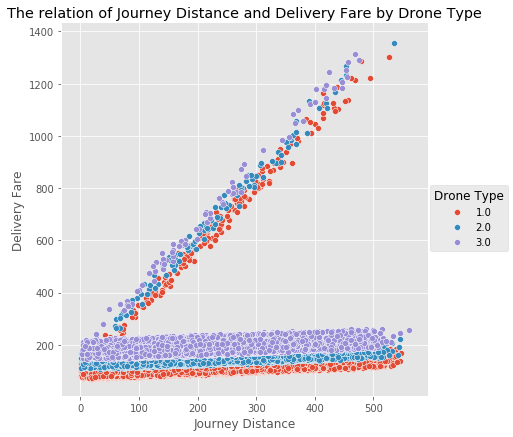

In [334]:
plt.figure()
sns.pairplot(
    x_vars="Journey Distance",
    y_vars="Delivery Fare",
    data=df,
    hue="Drone Type",
    size=8)
plt.title("The relation of Journey Distance and Delivery Fare by Drone Type")
plt.show()

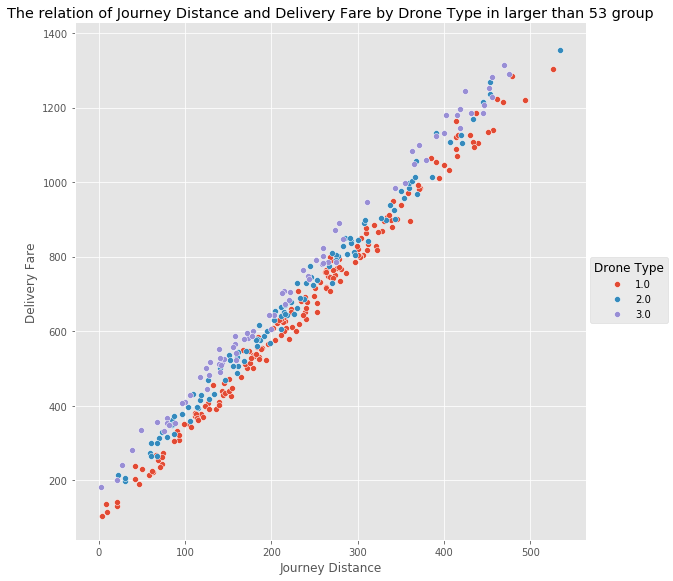

In [335]:
plt.figure()
sns.pairplot(
    x_vars="Journey Distance",
    y_vars="Delivery Fare",
    data=df.loc[df["Package Weight"] > 53],
    hue="Drone Type",
    size=8)
plt.title("The relation of Journey Distance and Delivery Fare by Drone Type in larger than 53 group")
plt.show()

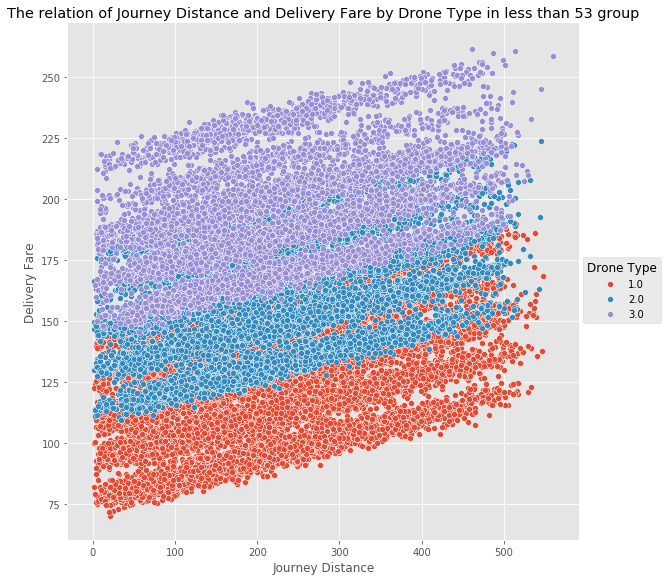

In [337]:
plt.figure()
sns.pairplot(
    x_vars="Journey Distance",
    y_vars="Delivery Fare",
    data=df.loc[df["Package Weight"] <= 53],
    hue="Drone Type",
    size=8)
plt.title("The relation of Journey Distance and Delivery Fare by Drone Type in less than 53 group")
plt.show()

This confirms the assumption that `Delivery Fare` should be divided into two groups.

C:\Users\gy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x576 with 0 Axes>

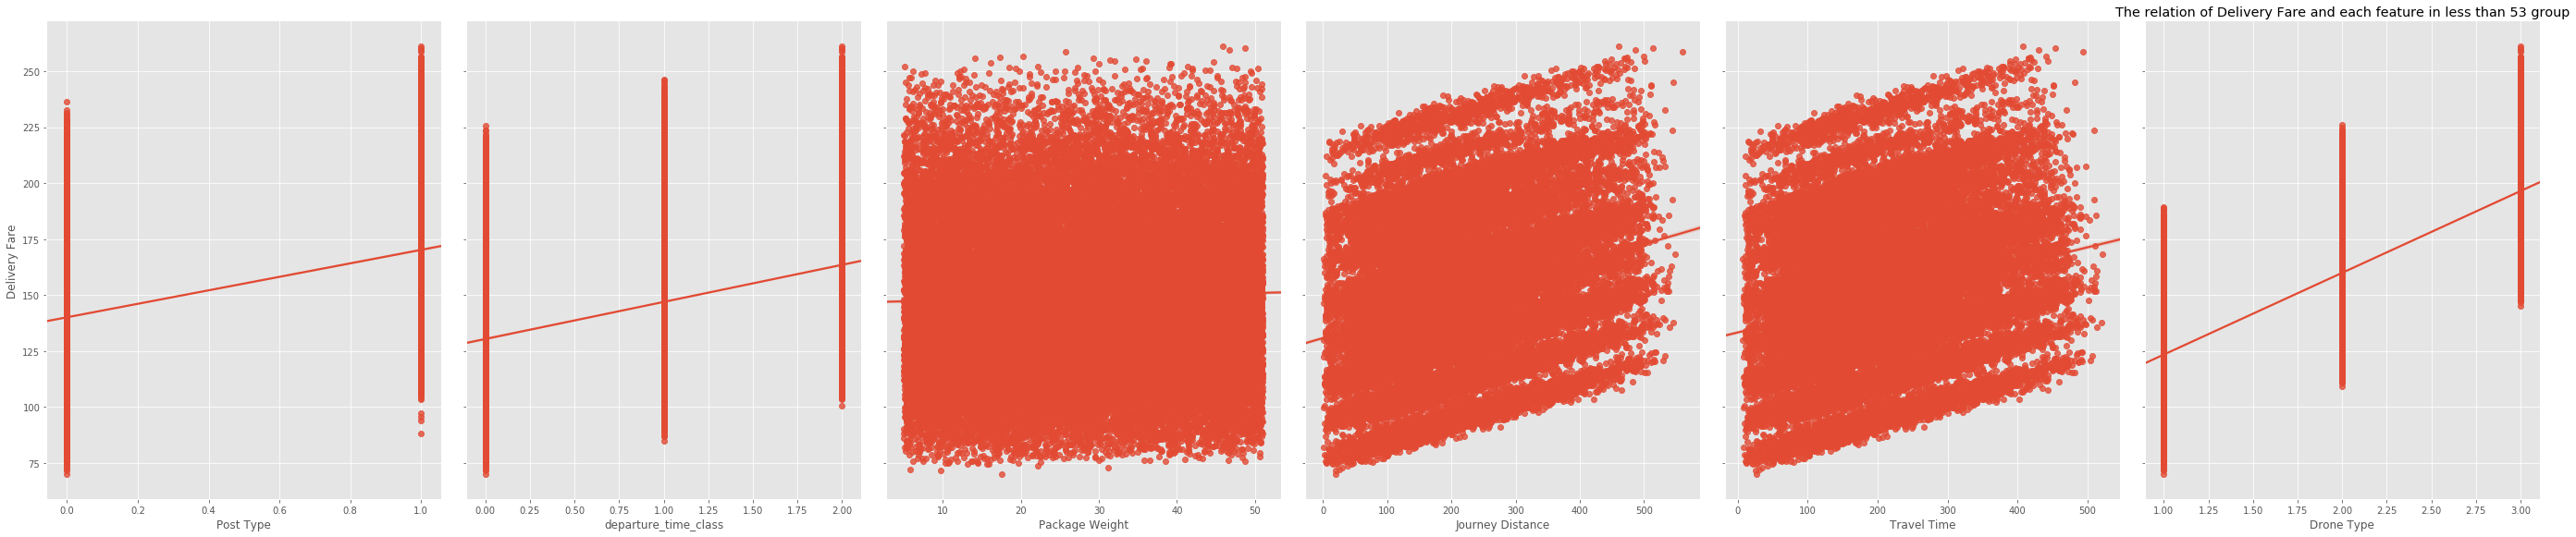

In [339]:
plt.figure()
sns.pairplot(
    x_vars=[
        "Post Type", "departure_time_class", "Package Weight",
        "Journey Distance", "Travel Time", "Drone Type"
    ],
    y_vars="Delivery Fare",
    data=df.loc[df["Package Weight"] <= 53],
    size=8,
    aspect=0.8,
    kind="reg")
plt.title("The relation of Delivery Fare and each feature in less than 53 group")
plt.show()

C:\Users\gy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x576 with 0 Axes>

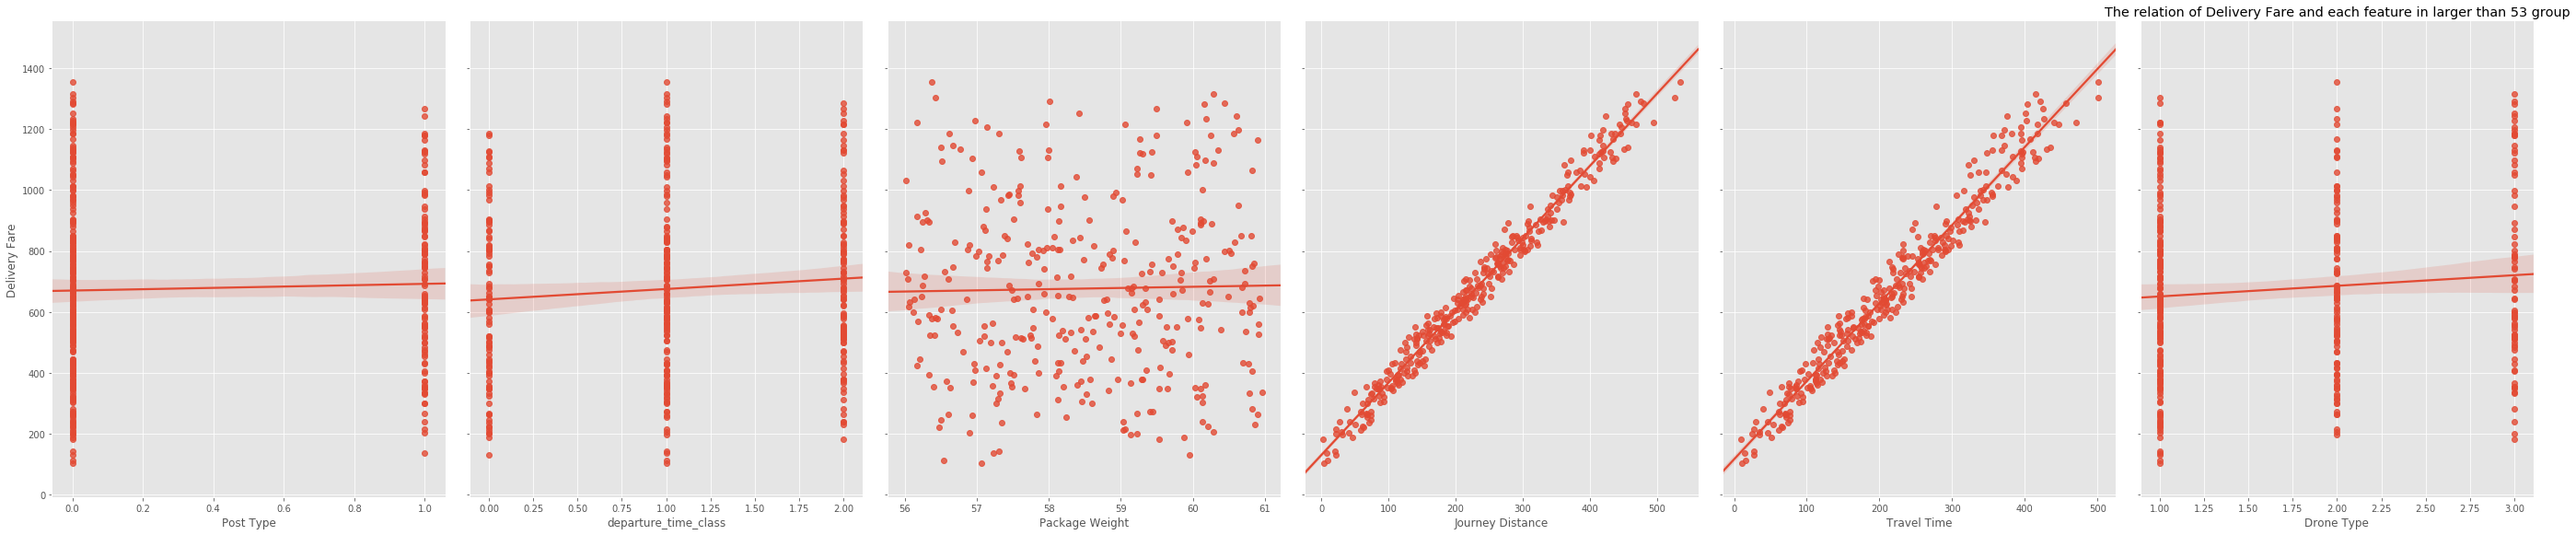

In [338]:
plt.figure()
sns.pairplot(
    x_vars=[
        "Post Type", "departure_time_class", "Package Weight",
        "Journey Distance", "Travel Time", "Drone Type"
    ],
    y_vars="Delivery Fare",
    data=df.loc[df["Package Weight"] > 53],
    size=8,
    aspect=0.8,
    kind="reg")
plt.title("The relation of Delivery Fare and each feature in larger than 53 group")
plt.show()

The figures above give the insights that these two groups follow different models.
* For `Package Weight` less than or equal to 53, `Delivery Fare` is simple linear with other predictors.
* For `Package Weight` larger than 53, `Delivery Fare` is non simple linear with other predictors, it may be polynomial model.

Now, try to build and find the most suitable model.

In [122]:
df.loc[df["Package Weight"] <= 53, "Delivery Fare"].isnull().sum()

30

In [123]:
df.loc[df["Package Weight"] > 53, "Delivery Fare"].isnull().sum()

0

All the missing values are in the group that `Package Weight` less than or equal to 53.

In [124]:
delivery_fare_1 = df.loc[(df["Package Weight"] <= 53)
                         & ~(df["Delivery Fare"].isnull())]
delivery_fare_2 = df.loc[df["Package Weight"] > 53]

In [125]:
# Try to find the most suitable model.
def find_model(data):
    # Create dataset
    X = data[[
        "Drone Type", "Post Type", "Package Weight", "Journey Distance",
        "departure_time_class"
    ]].values
    y = data["Delivery Fare"].values
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=40)
    reg_dict = {}
    # Test the most suitable model
    for i in range(1, 8):
        reg = LinearRegression()
        # Set the degree
        pol = PolynomialFeatures(degree=i)
        # Trasform to polynomial
        X_train_pol = pol.fit_transform(X_train)
        X_test_pol = pol.transform(X_test)
        # Train the data
        reg.fit(X_train_pol, y_train)
        # Make prediction
        y_pred = reg.predict(X_test_pol)
        # Compute and print R^2 and MSE
        print("Model ", i)
        print("R squared: {}".format(reg.score(X_test_pol, y_test)))
        mse = mean_squared_error(y_test, y_pred)
        print("Mean Squared Error: {}".format(mse))

In [126]:
find_model(delivery_fare_1)

Model  1
R squared: 0.9924037330762636
Mean Squared Error: 9.697900769332074
Model  2
R squared: 0.992401220956634
Mean Squared Error: 9.701107908724884
Model  3
R squared: 0.9923908875931955
Mean Squared Error: 9.71430016937676
Model  4
R squared: 0.9923745714522868
Mean Squared Error: 9.735130442596526
Model  5
R squared: 0.9923243084723432
Mean Squared Error: 9.799299513635859
Model  6
R squared: 0.9913062560253777
Mean Squared Error: 11.099013137152356
Model  7
R squared: 0.9827790544288848
Mean Squared Error: 21.985407171631824


In [127]:
find_model(delivery_fare_2)

Model  1
R squared: 0.9991959227255794
Mean Squared Error: 62.551345606234115
Model  2
R squared: 0.9998609040974351
Mean Squared Error: 10.820646411152428
Model  3
R squared: 0.9990596498039922
Mean Squared Error: 73.15238469307552
Model  4
R squared: 0.9955201876029749
Mean Squared Error: 348.49672091445757
Model  5
R squared: 0.9994244532944826
Mean Squared Error: 44.77333464658854
Model  6
R squared: 0.9832869580282569
Mean Squared Error: 1300.1527312898004
Model  7
R squared: 0.9309892115894169
Mean Squared Error: 5368.535853148728


We can found that:
* For `Package Weight` less than or equal to 53, `Delivery Fare` is simple linear with other predictors.
* For `Package Weight` larger than 53, `Delivery Fare` is polynomial model with degree 2.

Thus, `Package Weight` larger than 53 are all outliers, drop these data and using liner regression to fix the missing values in `Package Weight` less than 53 group.

In [128]:
# Build the regression model for missing imputation
def build_model(data):
    # Create dataset
    X = data[[
        "Drone Type", "Post Type", "Package Weight", "Journey Distance",
        "departure_time_class"
    ]].values
    y = data["Delivery Fare"].values
    reg = LinearRegression()
    reg.fit(X, y)
    return reg

In [129]:
reg = build_model(delivery_fare_1)
print(
    dict(
        zip([
            "Drone Type", "Post Type", "Package Weight", "Journey Distance",
            "departure_time_class"
        ], reg.coef_)))
print(reg.intercept_)

{'Drone Type': 36.47493212624678, 'Post Type': 30.001674339164914, 'Package Weight': 0.08022281941059341, 'Journey Distance': 0.0847806902868272, 'departure_time_class': 16.530648202166613}
38.566798929255384


Fix the missing values by linear imputation.

In [130]:
df.loc[df["Delivery Fare"].isnull(), "Delivery Fare"] = reg.predict(
    df.loc[df["Delivery Fare"].isnull(), [
        "Drone Type", "Post Type", "Package Weight", "Journey Distance",
        "departure_time_class"
    ]].values)

In [131]:
df = df.round({"Delivery Fare": 2})

Drop the outliers.

In [132]:
df.drop(df.loc[df["Package Weight"] > 53].index, inplace=True)
df.reset_index(drop=True, inplace=True)

## 5. Write the solution and check

Change the format of `Departure Date`, `Departure Time` and `Delivery Time` to the original type and format, that is `string`.

In [133]:
df["Departure Date"] = df["Departure Date"].apply(
    lambda x: x.strftime("%Y-%m-%d"))
df["Departure Time"] = df["Departure Time"].apply(
    lambda x: x.strftime("%H:%M:%S"))
df["Delivery Time"] = df["Delivery Time"].apply(
    lambda x: x.strftime("%H:%M:%S"))

Drop the column `departure_time_class`

In [134]:
df.drop(columns=["departure_time_class"], inplace=True)

Write the cleaned dataset to the solution file, then load and check it.

In [135]:
df.to_csv("28338758_solution.csv", index=False)

In [136]:
result = pd.read_csv("28338758_solution.csv")

In [137]:
result.columns

Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Delivery Fare'],
      dtype='object')

In [138]:
result.shape

(37019, 16)

In [139]:
result.head()

Id  Drone Type  Post Type  Package Weight  Origin Region  \
0  ID5490722930         1.0        1.0          24.682           41.0   
1  ID1873222318         1.0        0.0          11.162           21.0   
2  ID1853358232         1.0        0.0          42.004           22.0   
3  ID1252187452         2.0        0.0          20.493           25.0   
4  ID1453463903         1.0        0.0          42.588           48.0   

   Destination Region  Origin Latitude  Origin Longitude  \
0                51.0       -37.434971        143.086046   
1                21.0       -37.631498        147.293582   
2                 3.0       -38.957931        147.248241   
3                40.0       -38.169531        144.936011   
4                21.0       -36.615010        145.013192   

   Destination Latitude  Destination Longitude  Journey Distance  \
0            -37.626014             148.343174           464.513   
1            -37.591253             147.199682             9.415   
2            -37.207146             143.809040           358.832   
3            -38.081027             148.320117           296.490   
4            -37.685512             147.077540           218.505   

  Departure Date Departure Time  Travel Time Delivery Time  Delivery Fare  
0     2018-03-21       10:59:21       442.67      18:22:01         144.94  
1     2018-04-14       13:56:41        16.01      14:12:41          95.07  
2     2018-06-17       19:22:03       343.59      01:05:38         119.89  
3     2018-04-16       04:39:04       280.53      09:19:35         170.89  
4     2018-02-16       12:47:54       212.04      16:19:56         113.54

In [140]:
result.duplicated().sum()

0

In [141]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37019 entries, 0 to 37018
Data columns (total 16 columns):
Id                       37019 non-null object
Drone Type               37019 non-null float64
Post Type                37019 non-null float64
Package Weight           37019 non-null float64
Origin Region            37019 non-null float64
Destination Region       37019 non-null float64
Origin Latitude          37019 non-null float64
Origin Longitude         37019 non-null float64
Destination Latitude     37019 non-null float64
Destination Longitude    37019 non-null float64
Journey Distance         37019 non-null float64
Departure Date           37019 non-null object
Departure Time           37019 non-null object
Travel Time              37019 non-null float64
Delivery Time            37019 non-null object
Delivery Fare            37019 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.5+ MB


In [142]:
result.describe(include="all")

Id    Drone Type     Post Type  Package Weight  \
count          37019  37019.000000  37019.000000    37019.000000   
unique         37019           NaN           NaN             NaN   
top     ID1898896526           NaN           NaN             NaN   
freq               1           NaN           NaN             NaN   
mean             NaN      1.702747      0.299549       28.005715   
std              NaN      0.781510      0.458067       13.279813   
min              NaN      1.000000      0.000000        5.000000   
25%              NaN      1.000000      0.000000       16.496000   
50%              NaN      2.000000      0.000000       28.111000   
75%              NaN      2.000000      1.000000       39.488500   
max              NaN      3.000000      1.000000       50.999000   

        Origin Region  Destination Region  Origin Latitude  Origin Longitude  \
count    37019.000000        37019.000000     37019.000000      37019.000000   
unique            NaN                 NaN              NaN               NaN   
top               NaN                 NaN              NaN               NaN   
freq              NaN                 NaN              NaN               NaN   
mean        28.848132           28.948972       -37.771457        145.488543   
std         16.429341           16.452466         0.776120          1.715007   
min          1.000000            1.000000       -39.006897        142.769926   
25%         15.000000           15.000000       -38.417088        144.010372   
50%         29.000000           29.000000       -37.809018        145.421838   
75%         43.000000           43.000000       -37.087185        146.982820   
max         57.000000           57.000000       -36.507735        148.450979   

        Destination Latitude  Destination Longitude  Journey Distance  \
count           37019.000000           37019.000000      37019.000000   
unique                   NaN                    NaN               NaN   
top                      NaN                    NaN               NaN   
freq                     NaN                    NaN               NaN   
mean              -37.763453             145.493507        218.212215   
std                 0.782687               1.700704        111.958093   
min               -39.006897             142.769926          0.770000   
25%               -38.421947             144.032950        132.559500   
50%               -37.796257             145.451057        206.706000   
75%               -37.051975             146.958264        292.284500   
max               -36.507735             148.450979        559.843000   

       Departure Date Departure Time   Travel Time Delivery Time  \
count           37019          37019  37019.000000         37019   
unique            198          30207           NaN         30135   
top        2018-02-28       16:25:41           NaN      03:15:38   
freq              251              5           NaN             5   
mean              NaN            NaN    207.640355           NaN   
std               NaN            NaN    103.202966           NaN   
min               NaN            NaN      7.560000           NaN   
25%               NaN            NaN    128.460000           NaN   
50%               NaN            NaN    196.970000           NaN   
75%               NaN            NaN    276.375000           NaN   
max               NaN            NaN    520.620000           NaN   

        Delivery Fare  
count    37019.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       149.093911  
std         35.644968  
min         69.860000  
25%        121.570000  
50%        146.270000  
75%        174.075000  
max        261.240000

In [143]:
result.isnull().sum()

Id                       0
Drone Type               0
Post Type                0
Package Weight           0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance         0
Departure Date           0
Departure Time           0
Travel Time              0
Delivery Time            0
Delivery Fare            0
dtype: int64

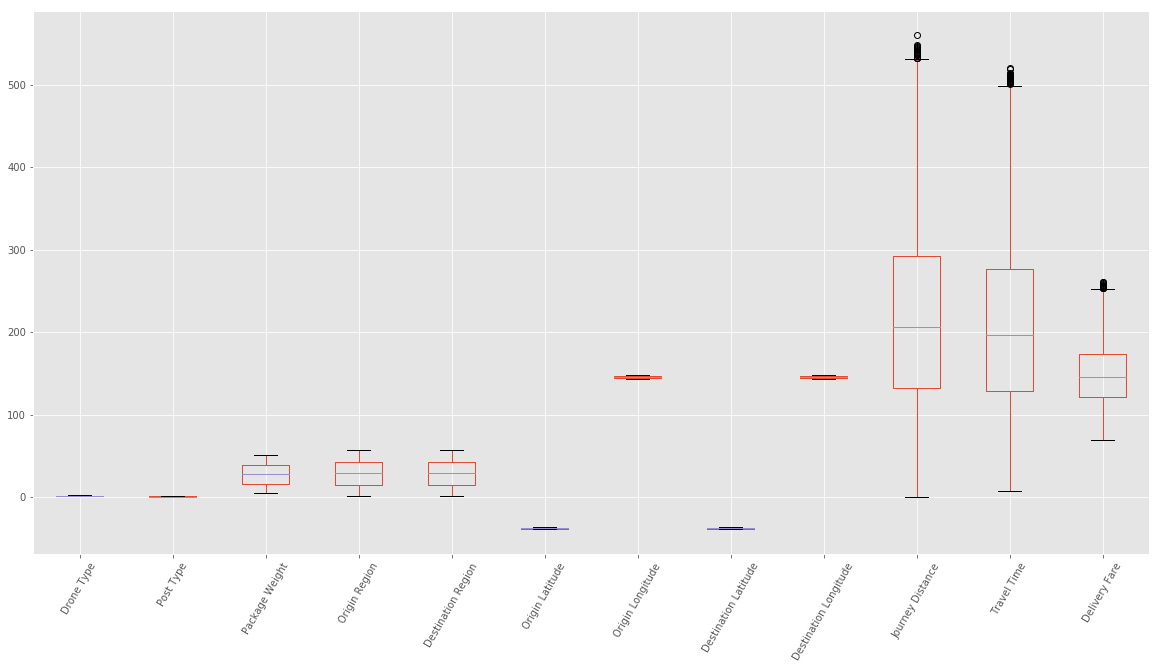

In [144]:
result.boxplot(rot=60)

## 6. Summary

The anomalies found in this dataset are:
* Syntactical Anomalies: 
  1. data format: inconsistent date format in `Departure Date`.
  2. irregularities: inconsistent data precision.
* Semantic Anomalies:
  1. invalid observations: for example `2018-02-30` in `Departure Date`
  2. contradictions: `Travel Time` not equal to `Delivery Time`-`Departure Time`, `Journey Distance` with actual distance calculated by coordinates.
  3. wrong data: for example `Journey Distance`
  4. duplicated rows
  5. integrity constraint violations: `Id` should be unique
  6. wrong categorical data: for example `Origin Region`, `Destination Region`
* Coverage Anomalies:
  1. missing values

The following will give a rough description of anomalies and the method to fix for each column.
- `Id` 
    * missing values: all the rows have missing ID can found a duplicated row in the dataset, so these those can be removed.
    * duplicated: The duplicated ID is also the duplicated row after fixing the `Delivery Time`, just remove it.
- `Post Type`
    * missing and wrong values: for `Id` begin with 1, the `Post Type` is 0, for `Id` begin with 5, the `Post Type` is 1.
- `Origin Latitude`, `Origin Longitude`, `Destination Latitude` and `Destination Longitude`
    * wrong data: the positive and negative sign can be fixed according the location of Victoria.
- `Journey Distance`
    * wrong value: calculated the distance according the coordinates
- `Origin Region` and `Destination Region`
    * missing values: calculate the center of each region, then find the closed center for the missing.
    * wrong values: find the wrong values using IQR, then fix it like missing values.
- `Delivery Time`
    * wrong values: part of the wrong values are because of changed position of `Departure Time`, another part can be fixed by $Departure Time + Travel Time$
- `Departure Time`
    * wrong values: changed position of `Delivery Time`
- `Travel Time`
    * missing values: fixed by $Delivery Time - Departure Time$, cross validated by speed of each drone.
- `Drone Type`
    * missing and wrong value: calculate the speeds(takeoff, travel and landing) of each drone type by `Travel Time` and `Journey Distance`. Cross validate the calculated distance by drone type, speeds and travel time with `Journey Distance`.
- `Delivery Fare`
    * outliers: use correlation to find predictors, with linear regression to calculate residuals. With the boxplot of residuals to find the outliers and drop them.
    * missing values: imputation with linear regression.